# Pandas:
## Analyzing Tabular Data using Python and Pandas:

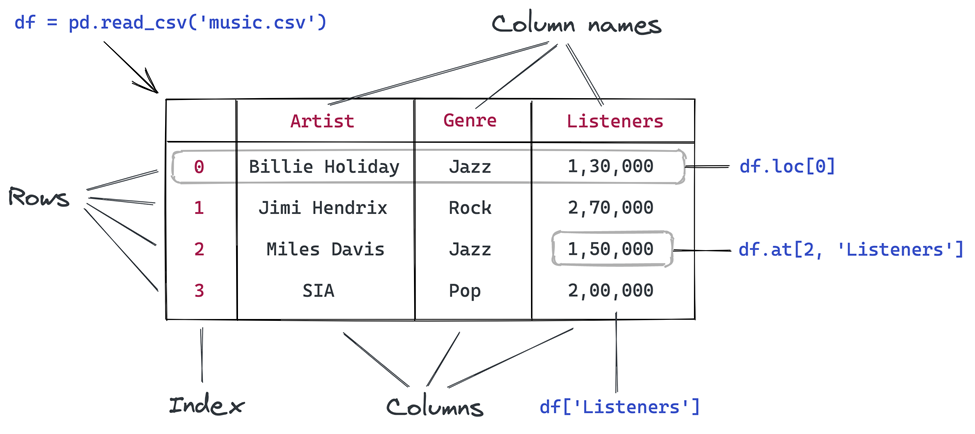

In [1]:
import numpy as np
import pandas as pd

In [2]:
pd.__version__

'2.2.1'

Pandas is a popular Python library used for working in tabular data (similar to the data stored in a spreadsheet). Pandas provides helper functions to read data from various file formats like CSV, Excel spreadsheets, HTML tables, JSON, SQL, and more.

Let's download a file `italy-covid-daywise.txt` which contains day-wise Covid-19 data for Italy in the following format:

```
date,new_cases,new_deaths,new_tests

2020-04-21,2256.0,454.0,28095.0

2020-04-22,2729.0,534.0,44248.0

2020-04-23,3370.0,437.0,37083.0

2020-04-24,2646.0,464.0,95273.0

2020-04-25,3021.0,420.0,38676.0

2020-04-26,2357.0,415.0,24113.0

2020-04-27,2324.0,260.0,26678.0

2020-04-28,1739.0,333.0,37554.0

...
```

This format of storing data is known as comma-separated values or CSV

**CSVs**: A comma-separated values (CSV) file is a delimited text file that uses a comma to separate values.

Each line of the file is a data record. Each record consists of one or more fields, separated by commas.

A CSV file typically stores tabular data (numbers and text) in plain text, in which case each line will have the same number of fields.

In [5]:
from urllib.request import urlretrieve

In [6]:
italy_cov_url = 'https://gist.githubusercontent.com/aakashns/f6a004fa20c84fec53262f9a8bfee775/raw/f309558b1cf5103424cef58e2ecb8704dcd4d74c/italy-covid-daywise.csv'

In [7]:
urlretrieve(italy_cov_url, 'datasets/italy-covid-daywise.csv')

('datasets/italy-covid-daywise.csv',
 <http.client.HTTPMessage at 0x2afc3b10610>)

In [8]:
covid_df = pd.read_csv('datasets/italy-covid-daywise.csv')

In [9]:
covid_df

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


Data from the file is read and stored in a **DataFrame** object - one of the core **data structures** in Pandas for storing and working with tabular data. 

We typically use the `_df` suffix in the variable names for dataframes.

In [11]:
type(covid_df)

pandas.core.frame.DataFrame

We can view some basic information about the data frame using the `.info` method.

In [12]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        248 non-null    object 
 1   new_cases   248 non-null    float64
 2   new_deaths  248 non-null    float64
 3   new_tests   135 non-null    float64
dtypes: float64(3), object(1)
memory usage: 7.9+ KB


`.info()` returns **object** data type for columns whose data type it cannot recognize easily. So it’s a generic name – object

In [13]:
covid_df.dtypes #returns columns and their dtypes as a Series

date           object
new_cases     float64
new_deaths    float64
new_tests     float64
dtype: object

In [14]:
covid_df.dtypes == 'float64'

date          False
new_cases      True
new_deaths     True
new_tests      True
dtype: bool

In [12]:
covid_df.dtypes[covid_df.dtypes == 'float64']

new_cases     float64
new_deaths    float64
new_tests     float64
dtype: object

In [15]:
covid_df.dtypes[covid_df.dtypes == 'float64'].index #useful to extract a list of all string columns or all numeric columns and then run some transformation on these columns in a loop

Index(['new_cases', 'new_deaths', 'new_tests'], dtype='object')

**Note**: there are 135 non null values in `new_tests` column implies there are some **NaN** values, i.e. cells where data was not provided. This is different from zero (0).

#### **NaN stands for Not a Number

In [17]:
covid_df.dtypes.values

array([dtype('O'), dtype('float64'), dtype('float64'), dtype('float64')],
      dtype=object)

In [24]:
covid_df.dtypes.values[2]

dtype('float64')

In [81]:
print(covid_df.dtypes.values[2] == 'float64')
print(covid_df.dtypes.values[2] == np.float64)
print(covid_df.dtypes.values[2] == float)
print(covid_df.dtypes.values[2] == 'float')
print(isinstance(covid_df.dtypes.values[2], np.float64)) # this is not an object of the np.float64 class. its a completely different class, see the cell below
print(isinstance(covid_df.dtypes.values[2], float)) # this is not an object of python's float class/type

True
True
True
True
False
False


In [79]:
type(covid_df.dtypes.values[2])

numpy.dtypes.Float64DType

It appears that each column contains values of a specific data type. You can view statistical information for numerical columns (mean, standard deviation, minimum/maximum values, Q1, Q2(median), Q3, and the number of non-empty values) using the `.describe` method.

In [32]:
covid_df.describe()

,new_cases,new_deaths,new_tests
count,248.000000,248.000000,135.000000
mean,1094.818548,143.133065,31699.674074
std,1554.508002,227.105538,11622.209757
min,-148.000000,-31.000000,7841.000000
25%,123.000000,3.000000,25259.000000
50%,342.000000,17.000000,29545.000000
75%,1371.750000,175.250000,37711.000000
max,6557.000000,971.000000,95273.000000


**NOTICE** that the count metric above counts non-null values only.

The `.columns` property/attribute of pandas dataframe gives the list of columns of a dataframe. 

In [33]:
covid_df.columns

Index(['date', 'new_cases', 'new_deaths', 'new_tests'], dtype='object')

You can also retrieve the number of rows and columns in the data frame using the `.shape` attribute.

In [34]:
covid_df.shape

(248, 4)

In [35]:
covid_df.size # returns the no. of elements in the df (row * col)

992

In [37]:
248 * 4

992

In [39]:
len(covid_df) #returns the no. of rows

248

In [41]:
covid_df.head()

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN


In [45]:
covid_df.iloc[0, -1], type(covid_df.iloc[0, -1]) # nan's type is float64

(nan, numpy.float64)

In [58]:
type(np.nan), isinstance(np.nan, float), isinstance(np.nan, np.float64), isinstance(np.nan, np.float32)

(float, True, False, False)

In [63]:
float('nan')

nan

In [65]:
np.nan is float('nan')

False

**NOTE**: how np.nan is in fact nothing but an object of the python built-in float object type. and nan in np.nan is nothing but an attribute of np module which has the value float('nan')

In [82]:
np.float64('nan'), type(np.float64('nan')) # this also is nan but it is of numpy.float64 class. and this is what you found in the covid_df dataframe.
# notice how the nan printed looks the same from both classes but the underlying class is different

(nan, numpy.float64)

In [83]:
float('nan') is np.float64('nan')

False

In [84]:
float('nan') == np.float64('nan')

False

In [85]:
np.float32('nan') == np.float64('nan')

False

---

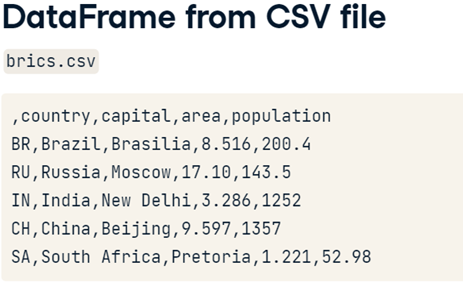

In [86]:
from pathlib import Path
df = pd.read_csv(Path('datasets/brics.csv'))

In [87]:
df

,Unnamed: 0,country,capital,area,population
0,BR,Brazil,Brasilia,8.516,200.40
1,RU,Russia,Moscow,17.100,143.50
2,IN,India,New Delhi,3.286,1252.00
3,CH,China,Beijing,9.597,1357.00
4,SA,South Africa,Pretoria,1.221,52.98


In [88]:
df.columns

Index(['Unnamed: 0', 'country', 'capital', 'area', 'population'], dtype='object')

In [89]:
list(df.columns)

['Unnamed: 0', 'country', 'capital', 'area', 'population']

We want the 1st column of values to be used as index for the pandas df and not be created as a separate column.
For this we use the `index_col` argument of `pd.read_csv()`

In [181]:
df = pd.read_csv(Path('datasets//brics.csv'), index_col=0)

In [182]:
df

,country,capital,area,population
BR,Brazil,Brasilia,8.516,200.40
RU,Russia,Moscow,17.100,143.50
IN,India,New Delhi,3.286,1252.00
CH,China,Beijing,9.597,1357.00
SA,South Africa,Pretoria,1.221,52.98


In [183]:
df.index

Index(['BR', 'RU', 'IN', 'CH', 'SA'], dtype='object')

Or, if you have already loaded a dataframe and wish to make one of the columns as the index, then use `df.set_index()`

In [184]:
df = pd.read_csv(Path('datasets/brics.csv'))

In [185]:
df

,Unnamed: 0,country,capital,area,population
0,BR,Brazil,Brasilia,8.516,200.40
1,RU,Russia,Moscow,17.100,143.50
2,IN,India,New Delhi,3.286,1252.00
3,CH,China,Beijing,9.597,1357.00
4,SA,South Africa,Pretoria,1.221,52.98


In [186]:
df = df.set_index('Unnamed: 0') # can pass in a single label or a list of column names

In [187]:
df

,country,capital,area,population
Unnamed: 0,,,,
BR,Brazil,Brasilia,8.516,200.40
RU,Russia,Moscow,17.100,143.50
IN,India,New Delhi,3.286,1252.00
CH,China,Beijing,9.597,1357.00
SA,South Africa,Pretoria,1.221,52.98


In [188]:
df.index

Index(['BR', 'RU', 'IN', 'CH', 'SA'], dtype='object', name='Unnamed: 0')

**NOTE**: the index of a pandas df NEED NOT be unique. that is it is not treated as a primary key internally in pandas.

### Retrieving data from a dataframe

#### Important:
The first thing you might want to do is retrieve data from this data frame, e.g., the counts of a specific day or the list of values in a particular column. To do this, it might help to understand the internal representation of data in a data frame. Conceptually, you can **think of a dataframe as a dictionary of lists**: keys are column names, and values are lists/arrays containing data for the respective columns.


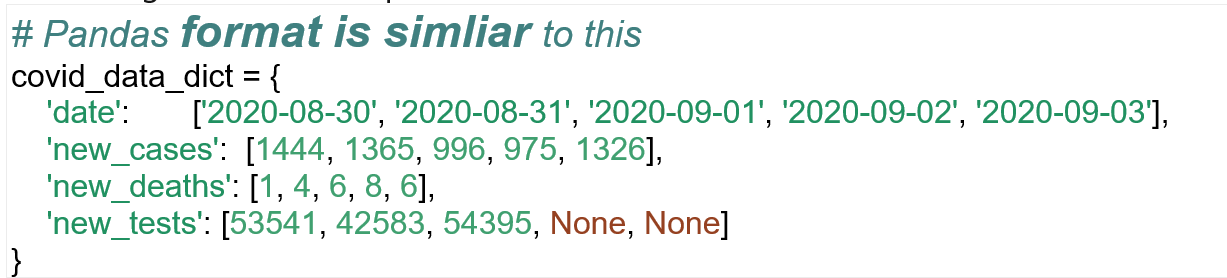

Representing data in the above format has a few benefits:

- All values in a column typically have the same type of value, so it's more efficient to store them in a single array.
- Retrieving the values for a particular row simply requires extracting the elements at a given index from each column array.
- The representation is more compact (column names are recorded only once) compared to other formats that use a dictionary for each row of data (see the example below).


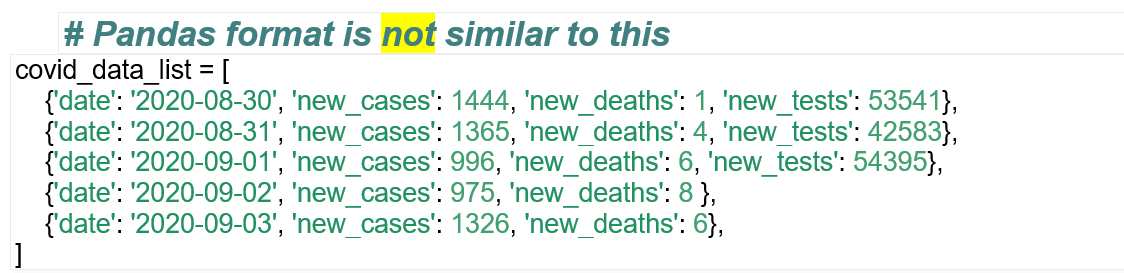

Now, lets practice retrieving data from the `covid_df` dataframe based on a our dictionary of lists understanding.

In [92]:
# to get a list of values from a specific column, use [] indexing notation
covid_df['new_cases']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
        ...  
243    1444.0
244    1365.0
245     996.0
246     975.0
247    1326.0
Name: new_cases, Length: 248, dtype: float64

Each column is represented using a data structure called **Series**, which is essentially a numpy array with some extra methods and properties.

Formally, Series is a 1-dimensional ndarray with axis labels

In [93]:
type(covid_df['new_cases'])

pandas.core.series.Series

Like arrays, you can retrieve a specific value with a series using the indexing notation [ ].

In [94]:
covid_df['new_cases'][244]

1365.0

In [95]:
df

,country,capital,area,population
BR,Brazil,Brasilia,8.516,200.40
RU,Russia,Moscow,17.100,143.50
IN,India,New Delhi,3.286,1252.00
CH,China,Beijing,9.597,1357.00
SA,South Africa,Pretoria,1.221,52.98


In [97]:
df['capital']

BR     Brasilia
RU       Moscow
IN    New Delhi
CH      Beijing
SA     Pretoria
Name: capital, dtype: object

In [101]:
df['capital'][2]
# as you can see in the FutureWarning, while currently giving a positional index is working on a series whose index labels
# are not integers, in future it is expected of you to pass the label only, not a positional index
# to use positional index, use series.iloc[idx] just like with dataframes

C:\Users\Abhishek\AppData\Local\Temp\ipykernel_20848\3055526974.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df['capital'][2]


'New Delhi'

In [102]:
df['capital']['IN']

'New Delhi'

In [104]:
df['capital'].iloc[2] # no warning when using iloc, the preferred way.

'New Delhi'

Pandas also provides the `.at` method to retrieve the element at a specific row & column directly.

In [105]:
covid_df

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


In [110]:
covid_df.at[244, 'new_deaths'] # note that df.at[][] will give a syntax error. only .at[i,j] works. even slicing doesnt work with .at ex: df.at[:3,j] will give ERROR

4.0

In [112]:
covid_df.at[246, 'date'] # note that only row,col works. you cannot write .at[col,row].
# And you also cannot pass just a row without specifying a col

'2020-09-02'

This is just like 2D matrix , where we write $a_{ij}$ is $i^{th}$ row and $j^{th}$ column. i.e. (row,column) indexing order

Instead of using the indexing notation [ ], Pandas also allows accessing columns as properties of the dataframe using the `.` notation. However, this method only works for columns whose names do not contain spaces or special characters. 

Basically in the dot notation, dataframe.column_name implies that `column_name` is the attribute or property of the class Dataframe and we know that attributes of a class are nothing but variables and variables follow the naming rule – **alphanumeric, can contain underscore, should not start with a number, should not contain spaces**.
Ideally should not start with underscore, but works.

Therefore in the dot notation column names become variables rather than strings of characters. Note that strings can contain spaces, special characters and whatever you want in the world.

In [113]:
covid_df.new_cases

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
        ...  
243    1444.0
244    1365.0
245     996.0
246     975.0
247    1326.0
Name: new_cases, Length: 248, dtype: float64

In [114]:
covid_df.new_tests[245]

54395.0

In [119]:
covid_df.new_tests.index

RangeIndex(start=0, stop=248, step=1)

In [116]:
type(covid_df.new_tests.index)

pandas.core.indexes.range.RangeIndex

You can also pass a range of values(indexes) inside sq. brackets to retrieve multiple rows. (just like in python lists)

In [120]:
covid_df.new_cases[230:240] # end index is excluded.

230     477.0
231     320.0
232     401.0
233     642.0
234     840.0
235     947.0
236    1071.0
237    1209.0
238     953.0
239     876.0
Name: new_cases, dtype: float64

Further, you can also pass a **list** of columns within the indexing notation[ ] to access a subset of the data frame with just the given columns.

In [121]:
covid_df[['date', 'new_cases']]

,date,new_cases
0,2019-12-31,0.0
1,2020-01-01,0.0
2,2020-01-02,0.0
3,2020-01-03,0.0
4,2020-01-04,0.0
...,...,...
243,2020-08-30,1444.0
244,2020-08-31,1365.0
245,2020-09-01,996.0
246,2020-09-02,975.0


**NOTICE** the square brackets inside square brackets. i.e if more than 1 columns are being retrieved they have to be passed as a list.

In [122]:
covid_df[['new_cases']] #note that this is different from covid_df['new_cases'] which returned a Series object. 
# this is still a Dataframe object

,new_cases
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
243,1444.0
244,1365.0
245,996.0
246,975.0


**View vs a copy**

In [124]:
df = covid_df

In [125]:
df

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


In [126]:
df['new_cases'][0] = 402

C:\Users\Abhishek\AppData\Local\Temp\ipykernel_20848\1015348906.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['new_cases'][0] = 402


In [127]:
covid_df

,date,new_cases,new_deaths,new_tests
0,2019-12-31,402.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


**NOTICE** that you had updated variable `df`, but we can see that even `covid_df` got updated in that location.

**IMPORTANT:**
The new data frame cases_df is simply a **"view"** of the original data frame `covid_df`. Both point to the same data in the **computer's memory.**

Changing any values inside one of them will also change the respective values in the other. Sharing data between data frames makes data manipulation in Pandas blazing fast. You needn't worry about the overhead of copying thousands or millions of rows every time you want to create a new data frame by operating on an existing one.


**Note**: Sometimes you might need a full copy of the data frame, in which case you can use the `.copy` method.

In [128]:
covid_df_copy = covid_df.copy()

In [129]:
covid_df_copy

,date,new_cases,new_deaths,new_tests
0,2019-12-31,402.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


The data within `covid_df_copy` is completely separate from `covid_df`, and changing values inside one of them will not affect the other.

In [130]:
covid_df_copy['new_cases'][1] = 550

C:\Users\Abhishek\AppData\Local\Temp\ipykernel_20848\108188862.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  covid_df_copy['new_cases'][1] = 550
C:\Users\Abhishek\AppData\Local\Temp\ipykernel_20848\108188862.py:1: SettingWithCopyWarnin

In [131]:
covid_df_copy

,date,new_cases,new_deaths,new_tests
0,2019-12-31,402.0,0.0,NaN
1,2020-01-01,550.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


In [132]:
covid_df

,date,new_cases,new_deaths,new_tests
0,2019-12-31,402.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


**NOTICE** how the value changed in the copy while the original stays unchanged. 

In [133]:
covid_df.head() # returns the first n rows of the dataframe. by default n=5

,date,new_cases,new_deaths,new_tests
0,2019-12-31,402.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN


Notice above that while the first few values in the new_cases and new_deaths columns are 0, the corresponding values within the new_tests column are NaN. That is because the CSV file does not contain any data for the new_tests column for specific dates (you can verify this by looking into the file). These values may be missing or unknown.

In [134]:
covid_df.tail() # returns the last n rows of the dataframe. by default n=5

,date,new_cases,new_deaths,new_tests
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN
247,2020-09-03,1326.0,6.0,NaN


To access a specific row of data, Pandas provides the `.loc` method, which stands for locate row

In [137]:
covid_df.loc[245]

date          2020-09-01
new_cases          996.0
new_deaths           6.0
new_tests        54395.0
Name: 245, dtype: object

In [138]:
type(covid_df.loc[245]) #the retrieved row is a Series object

pandas.core.series.Series

---

In [139]:
covid_df.head()

,date,new_cases,new_deaths,new_tests
0,2019-12-31,402.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN


NOTICE that the new_tests had NaN values in the starting first few rows meaning that testing data wasnt being recorded on these dates. 
To find out the first index which has a non-null value, use the `.first_valid_index()` method. 


In [140]:
covid_df.new_tests.first_valid_index()

111

To check that infact it is 111 index that’s the first non-NaN row, lets display a range of rows in its neighbourhood.

In [141]:
covid_df.new_tests[100:115]

100        NaN
101        NaN
102        NaN
103        NaN
104        NaN
105        NaN
106        NaN
107        NaN
108        NaN
109        NaN
110        NaN
111     7841.0
112    28095.0
113    44248.0
114    37083.0
Name: new_tests, dtype: float64

In [142]:
# or we can use .loc
covid_df.loc[100:115, 'new_tests']

100        NaN
101        NaN
102        NaN
103        NaN
104        NaN
105        NaN
106        NaN
107        NaN
108        NaN
109        NaN
110        NaN
111     7841.0
112    28095.0
113    44248.0
114    37083.0
115    95273.0
Name: new_tests, dtype: float64

**IMPORTANT**: NOTICE that `.loc` includes the upper bound index, this is unusual from everywhere else in python.

`.iloc` does not include the upper bound index. 

In [143]:
# or 
covid_df.loc[100:115]

,date,new_cases,new_deaths,new_tests
100,2020-04-09,3836.0,540.0,NaN
101,2020-04-10,4204.0,612.0,NaN
102,2020-04-11,3951.0,570.0,NaN
103,2020-04-12,4694.0,619.0,NaN
104,2020-04-13,4092.0,431.0,NaN
105,2020-04-14,3153.0,564.0,NaN
106,2020-04-15,2972.0,604.0,NaN
107,2020-04-16,2667.0,578.0,NaN
108,2020-04-17,3786.0,525.0,NaN
109,2020-04-18,3493.0,575.0,NaN


We can use the `.sample` method to retrieve a **random sample** of rows from the data frame.

In [151]:
np.random.seed(23)
covid_df.sample() # generates a random row from the dataframe.
# notice the returned object is still a dataframe, not a series object.
# numpy's np.random.seed() seems to work on random generation on pandas as well.

,date,new_cases,new_deaths,new_tests
5,2020-01-05,0.0,0.0,NaN


In [152]:
covid_df.sample(n=1)

,date,new_cases,new_deaths,new_tests
114,2020-04-23,3370.0,437.0,37083.0


In [153]:
type(covid_df.sample())

pandas.core.frame.DataFrame

In [154]:
covid_df.sample(10)

,date,new_cases,new_deaths,new_tests
7,2020-01-07,0.0,0.0,NaN
172,2020-06-20,-148.0,47.0,29875.0
244,2020-08-31,1365.0,4.0,42583.0
221,2020-08-08,552.0,3.0,26631.0
242,2020-08-29,1460.0,9.0,64294.0
0,2019-12-31,402.0,0.0,NaN
214,2020-08-01,379.0,9.0,31905.0
238,2020-08-25,953.0,4.0,45798.0
171,2020-06-19,331.0,66.0,28570.0
15,2020-01-15,0.0,0.0,NaN


In [156]:
covid_df.sample(n=5,axis=0) # random sample of rows of the dataframe, which is the default

,date,new_cases,new_deaths,new_tests
113,2020-04-22,2729.0,534.0,44248.0
66,2020-03-06,769.0,41.0,NaN
196,2020-07-14,169.0,13.0,24222.0
159,2020-06-07,270.0,72.0,27894.0
53,2020-02-22,14.0,0.0,NaN


In [158]:
covid_df.sample(n=2, axis=1) # random sample of columns of the dataframe.

,new_tests,new_cases
0,NaN,402.0
1,NaN,0.0
2,NaN,0.0
3,NaN,0.0
4,NaN,0.0
...,...,...
243,53541.0,1444.0
244,42583.0,1365.0
245,54395.0,996.0
246,NaN,975.0


**NOTICE** that the rows are NOT randomized. its all 248 rows in the original order of the dataframe. Only the columns have been randomized. 

**NOTE**: value of `n` cannot be greater than the length along that `axis` specified. 

for example since here the dataframe has only 4 columns, `n` cannot be > 4 when `axis` is set to 1

and similarly `n` cannot be greater than 248 when `axis` is set to 0. If n=248 then that basically means return the entire dataframe(all rows) but in a random order.

In [159]:
Auto = pd.read_csv('datasets/Auto.csv')

In [160]:
Auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [162]:
Auto['horsepower']

0      130
1      165
2      150
3      150
4      140
      ... 
392     86
393     52
394     84
395     79
396     82
Name: horsepower, Length: 397, dtype: object

Notice the dtype is object. which means that one or more values were interpreted as str. Because we are reading data from a CSV, the only possible data types are numbers and text.

In [166]:
np.unique(Auto['horsepower'])

array(['100', '102', '103', '105', '107', '108', '110', '112', '113',
       '115', '116', '120', '122', '125', '129', '130', '132', '133',
       '135', '137', '138', '139', '140', '142', '145', '148', '149',
       '150', '152', '153', '155', '158', '160', '165', '167', '170',
       '175', '180', '190', '193', '198', '200', '208', '210', '215',
       '220', '225', '230', '46', '48', '49', '52', '53', '54', '58',
       '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70',
       '71', '72', '74', '75', '76', '77', '78', '79', '80', '81', '82',
       '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93',
       '94', '95', '96', '97', '98', '?'], dtype=object)

Here we notice one of the values is a '?', which is used to encode a missing value in this dataset.
We can handle this case while loading the file using `pd.read_csv()` using the `na_values` parameter

In [167]:
Auto = pd.read_csv('datasets/Auto.csv', na_values=['?'])

In [168]:
Auto['horsepower']

0      130.0
1      165.0
2      150.0
3      150.0
4      140.0
       ...  
392     86.0
393     52.0
394     84.0
395     79.0
396     82.0
Name: horsepower, Length: 397, dtype: float64

Now the dtype is float64.

**NOTE**: When dealing with data files that have a separator/delimiter that is not a comma, but some other character or pattern, then use the `sep` argument in `pd.read_csv()` to handle that. ex: `sep='#'`, `sep='|'`, `sep='\s+'` (handle all types of whitespace as a regex). `sep` accepts str or regex patterns

In [170]:
brics_df = pd.read_csv('brics-data.csv', index_col=0)

In [172]:
brics_df

,country,capital,area,population
BR,Brazil,Brasilia,8.516,200.40
RU,Russia,Moscow,17.100,143.50
IN,India,New Delhi,3.286,1252.00
CH,China,Beijing,9.597,1357.00
SA,South Africa,Pretoria,1.221,52.98


In [176]:
brics_df[:3] # slicing a dataframe works normally even though we can a named str index
# note that brics_df.loc[:3] DOES NOT work. you need to pass named indexes to .loc always

,country,capital,area,population
BR,Brazil,Brasilia,8.516,200.4
RU,Russia,Moscow,17.100,143.5
IN,India,New Delhi,3.286,1252.0


#### Conditional filtering:

In [63]:
covid_df['new_cases'] > 1000

0      False
1      False
2      False
3      False
4      False
       ...  
243     True
244     True
245    False
246    False
247     True
Name: new_cases, Length: 248, dtype: bool

In [64]:
covid_df[covid_df['new_cases'] > 1000] # first the inside condition is checked then only the true rows are retrieved.

,date,new_cases,new_deaths,new_tests
68,2020-03-08,1247.0,36.0,NaN
69,2020-03-09,1492.0,133.0,NaN
70,2020-03-10,1797.0,98.0,NaN
72,2020-03-12,2313.0,196.0,NaN
73,2020-03-13,2651.0,189.0,NaN
...,...,...,...,...
241,2020-08-28,1409.0,5.0,65135.0
242,2020-08-29,1460.0,9.0,64294.0
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0


**NOTE**: to work with multiple conditions in pandas indexing, you can use the bitwise and (i.e. `&`) OR bitwise or (i.e. `|`)

**NOTE** that you cannot use the normal python 'and' and 'or’ operators in pandas indexing.

**IMPORTANT**:  the parenthesis around the conditions are necessary when having multiple conditions

In [65]:
covid_df[(covid_df['new_cases'] > 1000) and (covid_df['new_deaths'] > 150)] #"and" and "or" do not work in pandas filtering

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [66]:
covid_df[(covid_df['new_cases'] > 1000) & (covid_df['new_deaths'] > 150)]

,date,new_cases,new_deaths,new_tests
72,2020-03-12,2313.0,196.0,NaN
73,2020-03-13,2651.0,189.0,NaN
74,2020-03-14,2547.0,252.0,NaN
75,2020-03-15,3497.0,173.0,NaN
76,2020-03-16,2823.0,370.0,NaN
...,...,...,...,...
128,2020-05-07,1444.0,369.0,13665.0
129,2020-05-08,1401.0,274.0,45428.0
130,2020-05-09,1327.0,243.0,36091.0
131,2020-05-10,1083.0,194.0,31384.0


In [68]:
df = pd.read_csv(Path('datasets/brics.csv'), index_col=0)

In [69]:
df

,country,capital,area,population
BR,Brazil,Brasilia,8.516,200.40
RU,Russia,Moscow,17.100,143.50
IN,India,New Delhi,3.286,1252.00
CH,China,Beijing,9.597,1357.00
SA,South Africa,Pretoria,1.221,52.98


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, BR to SA
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     5 non-null      object 
 1   capital     5 non-null      object 
 2   area        5 non-null      float64
 3   population  5 non-null      float64
dtypes: float64(2), object(2)
memory usage: 200.0+ bytes


In [96]:
# lets say you want to filter out countries India, China and Brazil

In [71]:
df[(df['country'] == 'India') | (df['country'] == 'China') | (df['country'] == 'Brazil')]

,country,capital,area,population
BR,Brazil,Brasilia,8.516,200.4
IN,India,New Delhi,3.286,1252.0
CH,China,Beijing,9.597,1357.0


but there is an easier and faster way to do the above using `df.isin()`

In [72]:
df[df['country'].isin(['India', 'China', 'Brazil'])]

,country,capital,area,population
BR,Brazil,Brasilia,8.516,200.4
IN,India,New Delhi,3.286,1252.0
CH,China,Beijing,9.597,1357.0


Therefore, `.isin()` is very powerful on filtering on **categorical variables**.

In [73]:
df.loc[['BR', 'IN', 'CH']] #another alternate way to filter out India, China and Brazil from this df.

,country,capital,area,population
BR,Brazil,Brasilia,8.516,200.4
IN,India,New Delhi,3.286,1252.0
CH,China,Beijing,9.597,1357.0


In [74]:
df.loc[['BR', 'IN', 'CH'], ['country', 'capital']]

,country,capital
BR,Brazil,Brasilia
IN,India,New Delhi
CH,China,Beijing


In [75]:
df.loc[[0,1,2], ['country', 'capital']] # this gives error as loc works with actual indexes not positions and therefore expects country codes in the row indices NOT numbers

KeyError: "None of [Index([0, 1, 2], dtype='int32')] are in the [index]"

In [76]:
df.iloc[[0,2,3], [0,1]] #use .iloc for positional index based filtering

,country,capital
BR,Brazil,Brasilia
IN,India,New Delhi
CH,China,Beijing


In summary, a powerful set of operations is available to index the rows and columns of data frames. For integer based queries, use the `iloc[]` method. For string and Boolean
selections, use the `loc[]` method. For functional queries that filter rows, use the `loc[]` method
with a function (typically a `lambda`) in the rows argument.

### Analyzing data from dataframes:

**Q**: What are the total number of reported cases and deaths related to Covid-19 in Italy?

Similar to Numpy arrays, a Pandas series and dataframes supports the `.sum()` method to answer these questions.

In [77]:
covid_df = pd.read_csv('datasets/italy-covid-daywise.csv')

In [78]:
covid_df['new_cases'].sum()

271515.0

In [79]:
covid_df.new_deaths.sum()

35497.0

**Q**: What is the overall death rate (ratio of reported deaths to reported cases)?

In [80]:
covid_df.new_deaths.sum() / covid_df['new_cases'].sum()

0.13073679170579894

# Creating dataframes

Creating and adding new columns can go by many names, including mutating a DataFrame, transforming a DataFrame, and feature engineering.

```
>>>Your_df[‘new_col_name’] = [list of values]
Ex: car_df[‘year’] = [2000,2001,2002,2003,2004]  #this is become a series.
```

In [81]:
covid_df['positivity_rate'] = covid_df['new_cases'] / covid_df['new_tests']
# the result of covid_df['new_cases'] / covid_df['new_tests'] is a new series which we are assigning to a new column in the dataframe

However, keep in mind that sometimes it takes a few days to get the results for a test, so we can't compare the number of new cases with the number of tests conducted on the same day. **Any inference based on this positive_rate column is likely to be incorrect.** **It's essential to watch out for such subtle relationships that are often not conveyed within the CSV file and require some external context.** It's always a good idea to read through the documentation provided with the dataset or ask for more information.

In [83]:
covid_df.sample(5)
# notice the new column positivity_rate has been added

,date,new_cases,new_deaths,new_tests,positivity_rate
69,2020-03-09,1492.0,133.0,NaN,NaN
215,2020-08-02,295.0,5.0,24496.0,0.012043
32,2020-02-01,0.0,0.0,NaN,NaN
194,2020-07-12,188.0,7.0,23061.0,0.008152
218,2020-08-05,190.0,5.0,29739.0,0.006389


You can also edit the entire series after creating, simply equate new list of values.

In [84]:
car_df = pd.read_csv(Path('datasets/car_price_data.csv'))

In [85]:
car_df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [86]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

To delete a column in a dataframe:

In [87]:
del(car_df["Model"]) #removes the column

In [88]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Year               11914 non-null  int64  
 2   Engine Fuel Type   11911 non-null  object 
 3   Engine HP          11845 non-null  float64
 4   Engine Cylinders   11884 non-null  float64
 5   Transmission Type  11914 non-null  object 
 6   Driven_Wheels      11914 non-null  object 
 7   Number of Doors    11908 non-null  float64
 8   Market Category    8172 non-null   object 
 9   Vehicle Size       11914 non-null  object 
 10  Vehicle Style      11914 non-null  object 
 11  highway MPG        11914 non-null  int64  
 12  city mpg           11914 non-null  int64  
 13  Popularity         11914 non-null  int64  
 14  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 1.4+ MB


In [89]:
car_df.head()

,Make,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


**Series object:**

A one dimensional **labeled array** capable of holding any data type.

**Dataframe object:**

A two dimensional labeled data structure with columns of potentially different types

**indexing in pandas dataframes:**

In [90]:
car_df.index, type(car_df.index) # the stop index is NOT included. the last index will be stop-1

(RangeIndex(start=0, stop=11914, step=1), pandas.core.indexes.range.RangeIndex)

In [91]:
brics_df = pd.read_csv(Path('datasets/brics.csv'), index_col=0)

In [92]:
brics_df

,country,capital,area,population
BR,Brazil,Brasilia,8.516,200.40
RU,Russia,Moscow,17.100,143.50
IN,India,New Delhi,3.286,1252.00
CH,China,Beijing,9.597,1357.00
SA,South Africa,Pretoria,1.221,52.98


In [93]:
brics_df.index, type(brics_df.index)

(Index(['BR', 'RU', 'IN', 'CH', 'SA'], dtype='object'),
 pandas.core.indexes.base.Index)

In [94]:
# These indexes are all common across all columns of the dataframe. therefore, 
car_df["Make"].index

RangeIndex(start=0, stop=11914, step=1)

**Changing dataframe indexes:**

you can change the index, so ex: instead of 0,1,2,3, etc it becomes a,b,c,d, etc by doing:
```
>>>df.index = ['a', 'b', 'c', 'd', 'e'] # if df had 5 rows for example. 
```
you need to enter as many elements in it as there are rows in the dataframe. Therefore this is usually not done as database has 1000s of rows. 

**NOTE**: once you make a change like above then `df.loc[]` will not work on integer values like 0,1,2 but on the new indexes 'a', 'b', 'c'

If you still want to access rows based on integer indexes(positional indexes) then use, `df.iloc[]`

**NOTE**: when using `df.loc` or `df.iloc` the returned object will be a dataframe only when multiple indexes and multiple columns are being retrieved. If either of them is chosen to be a single value then the returned object is a Series. 

In [95]:
brics_df.iloc[4,:] #since only 1 row is returned, its a series object.

country       South Africa
capital           Pretoria
area                 1.221
population           52.98
Name: SA, dtype: object

In [96]:
brics_df.iloc[1:4,3] #since only 1 column is returned, its a series object.

RU     143.5
IN    1252.0
CH    1357.0
Name: population, dtype: float64

In [97]:
brics_df.iloc[3:,1:2] #since range(multiple) of rows and columns are mentioned, therefore returned object is dataframe.

,capital
CH,Beijing
SA,Pretoria


In [98]:
brics_df.iloc[[2,4],2:4] #since range(multiple) of rows and columns are mentioned, therefore returned object is dataframe.

,area,population
IN,3.286,1252.00
SA,1.221,52.98


To reset indexes to default 0,1,2,... use:


In [99]:
brics_df.reset_index() # note that a new dataframe is created by default. not changed in place. therefore brics_df is still the same

,index,country,capital,area,population
0,BR,Brazil,Brasilia,8.516,200.40
1,RU,Russia,Moscow,17.100,143.50
2,IN,India,New Delhi,3.286,1252.00
3,CH,China,Beijing,9.597,1357.00
4,SA,South Africa,Pretoria,1.221,52.98


**NOTICE** the newly created index column storing the indexes that were being used before reseting.

To drop the newly created index column, run:

In [100]:
brics_df.reset_index(drop=True)

,country,capital,area,population
0,Brazil,Brasilia,8.516,200.40
1,Russia,Moscow,17.100,143.50
2,India,New Delhi,3.286,1252.00
3,China,Beijing,9.597,1357.00
4,South Africa,Pretoria,1.221,52.98


In [102]:
brics_df = brics_df.reset_index(drop=True)

In [103]:
brics_df

,country,capital,area,population
0,Brazil,Brasilia,8.516,200.40
1,Russia,Moscow,17.100,143.50
2,India,New Delhi,3.286,1252.00
3,China,Beijing,9.597,1357.00
4,South Africa,Pretoria,1.221,52.98


**String operations:**

In [138]:
car_df.head()

,Make,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [139]:
car_df['Transmission Type']

0           MANUAL
1           MANUAL
2           MANUAL
3           MANUAL
4           MANUAL
           ...    
11909    AUTOMATIC
11910    AUTOMATIC
11911    AUTOMATIC
11912    AUTOMATIC
11913    AUTOMATIC
Name: Transmission Type, Length: 11914, dtype: object

We want to have all string values in lower case in the "Transmission Type" column

In [171]:
car_df['Transmission Type'].str.lower() #note that the original df is still the same. therefore you need to reassign the result to the df column

0           manual
1           manual
2           manual
3           manual
4           manual
           ...    
11909    automatic
11910    automatic
11911    automatic
11912    automatic
11913    automatic
Name: Transmission Type, Length: 11914, dtype: object

In [140]:
car_df['Transmission Type'] = car_df['Transmission Type'].str.lower()

In [141]:
car_df.head()

,Make,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,2011,premium unleaded (required),335.0,6.0,manual,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,2011,premium unleaded (required),300.0,6.0,manual,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,2011,premium unleaded (required),300.0,6.0,manual,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,2011,premium unleaded (required),230.0,6.0,manual,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,2011,premium unleaded (required),230.0,6.0,manual,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


Suppose we want to get rid of all spaces between words, and replace with '_' then,

In [176]:
car_df['Driven_Wheels'].value_counts()

Driven_Wheels
front wheel drive    4787
rear wheel drive     3371
all wheel drive      2353
four wheel drive     1403
Name: count, dtype: int64

In [142]:
car_df['Driven_Wheels'].str.replace(' ','_')

0         rear_wheel_drive
1         rear_wheel_drive
2         rear_wheel_drive
3         rear_wheel_drive
4         rear_wheel_drive
               ...        
11909      all_wheel_drive
11910      all_wheel_drive
11911      all_wheel_drive
11912      all_wheel_drive
11913    front_wheel_drive
Name: Driven_Wheels, Length: 11914, dtype: object

`df.nunique()` tells how many unique values are there in each column. can also be applied to a specific column for just that column.

In [179]:
car_df.nunique()

Make                   48
Year                   28
Engine Fuel Type       10
Engine HP             356
Engine Cylinders        9
Transmission Type       5
Driven_Wheels           4
Number of Doors         3
Market Category        71
Vehicle Size            3
Vehicle Style          16
highway MPG            59
city mpg               69
Popularity             48
MSRP                 6049
dtype: int64

In [181]:
car_df['Make'].nunique()

48

In [144]:
car_df['Transmission Type'].nunique()

5

In [146]:
car_df['Transmission Type'].unique() #lists all the unique values in a series

array(['manual', 'automatic', 'automated_manual', 'direct_drive',
       'unknown'], dtype=object)

#### Using the .drop() method in pandas to remove columns:

In [153]:
covid_df

,date,new_cases,new_deaths,new_tests,positivity_rate
0,2019-12-31,0.0,0.0,NaN,NaN
1,2020-01-01,0.0,0.0,NaN,NaN
2,2020-01-02,0.0,0.0,NaN,NaN
3,2020-01-03,0.0,0.0,NaN,NaN
4,2020-01-04,0.0,0.0,NaN,NaN
...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,0.026970
244,2020-08-31,1365.0,4.0,42583.0,0.032055
245,2020-09-01,996.0,6.0,54395.0,0.018311
246,2020-09-02,975.0,8.0,NaN,NaN


In [155]:
covid_df.drop(columns=['positivity_rate']) # can pass multiple columns in the list

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


In [158]:
covid_df.drop(columns='positivity_rate') #if dropping only 1 column then not necessary to pass as a list

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


`.drop()` creates a copy by default. therefore `covid_df` is still the same. 

To make change in place, set `inplace=True`

In [159]:
covid_df.drop(columns=['positivity_rate'], inplace=True)
# or, covid_df.drop("positivity_rate", axis=1, inplace=True)

In [160]:
covid_df

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


To drop rows that contain missing values: use `.dropna()` method.

In [161]:
police_df = pd.read_csv(Path('datasets/archive/police.csv'))

In [162]:
police_df.head()

,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,RI,2005-01-04,12:55,NaN,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,RI,2005-01-23,23:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,RI,2005-02-17,04:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,RI,2005-02-20,17:15,NaN,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
4,RI,2005-02-24,01:20,NaN,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3


In [163]:
police_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91741 entries, 0 to 91740
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   state               91741 non-null  object 
 1   stop_date           91741 non-null  object 
 2   stop_time           91741 non-null  object 
 3   county_name         0 non-null      float64
 4   driver_gender       86536 non-null  object 
 5   driver_race         86539 non-null  object 
 6   violation_raw       86539 non-null  object 
 7   violation           86539 non-null  object 
 8   search_conducted    91741 non-null  bool   
 9   search_type         3307 non-null   object 
 10  stop_outcome        86539 non-null  object 
 11  is_arrested         86539 non-null  object 
 12  stop_duration       86539 non-null  object 
 13  drugs_related_stop  91741 non-null  bool   
 14  district            91741 non-null  object 
dtypes: bool(2), float64(1), object(12)
memory usage: 9.3+

Suppose for this data containing police activity, driver_gender and stop_duration are critical columns for your analysis and therefore any rows containing a missing value in any of these columns will be irrelevant and can be dropped.

Because we specify these columns as a subset only the presence of missing values in these 2 columns will decide if a row will be dropped. 

In [165]:
police_df.dropna(subset=['driver_gender', 'stop_duration'])
# again returns a copy. to change in place, set inplace=True

,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,RI,2005-01-04,12:55,NaN,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,RI,2005-01-23,23:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,RI,2005-02-17,04:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,RI,2005-02-20,17:15,NaN,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
4,RI,2005-02-24,01:20,NaN,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91736,RI,2015-12-31,21:21,NaN,F,Black,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,Zone K2
91737,RI,2015-12-31,21:59,NaN,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
91738,RI,2015-12-31,22:04,NaN,M,White,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,Zone X3
91739,RI,2015-12-31,22:09,NaN,F,Hispanic,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,0-15 Min,False,Zone K3


In [166]:
police_df.dropna(subset=['driver_gender', 'stop_duration'], inplace=True)

In [167]:
police_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 86536 entries, 0 to 91740
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   state               86536 non-null  object 
 1   stop_date           86536 non-null  object 
 2   stop_time           86536 non-null  object 
 3   county_name         0 non-null      float64
 4   driver_gender       86536 non-null  object 
 5   driver_race         86536 non-null  object 
 6   violation_raw       86536 non-null  object 
 7   violation           86536 non-null  object 
 8   search_conducted    86536 non-null  bool   
 9   search_type         3307 non-null   object 
 10  stop_outcome        86536 non-null  object 
 11  is_arrested         86536 non-null  object 
 12  stop_duration       86536 non-null  object 
 13  drugs_related_stop  86536 non-null  bool   
 14  district            86536 non-null  object 
dtypes: bool(2), float64(1), object(12)
memory usage: 9.4+ MB


**NOTE**: if you dont pass subset to `.dropna()`, it will consider all the columns to check for NA. even if 1 NA is found in a row that row will be dropped.
This is controlled by the `how` parameter of `.dropna()` which is set to **any** by default. It can be changed to **all** if you want to drop rows only if all columns have NA in that row.

#### How to display all rows from data frame using pandas

In [168]:
covid_df

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


Notice there are 248 rows but only 10 are being shown here. 

Pandas property name to change this value is `display.min_rows`. We can change this value to display as many rows as you needed. If you want twenty rows to display, you can set display.max_rows property value to TWENTY as shown below.

In [169]:
pd.set_option('display.min_rows', 20)

In [170]:
covid_df

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
5,2020-01-05,0.0,0.0,NaN
6,2020-01-06,0.0,0.0,NaN
7,2020-01-07,0.0,0.0,NaN
8,2020-01-08,0.0,0.0,NaN
9,2020-01-09,0.0,0.0,NaN


To display all rows, setp display.max_rows to None. With this statement display.min_rows setting is ignored even if you set any value, it will display the whole table.

In [172]:
pd.set_option('display.max_rows',None)

In [173]:
covid_df

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
5,2020-01-05,0.0,0.0,NaN
6,2020-01-06,0.0,0.0,NaN
7,2020-01-07,0.0,0.0,NaN
8,2020-01-08,0.0,0.0,NaN
9,2020-01-09,0.0,0.0,NaN


**NOTE**: Both `pd.set_option('display.max_rows', x)` and `pd.options.display.max_rows = x` (where x is some number) should work.

Similarly, there is `display.max_columns`

To get back to the default value, you need to reset this option:

In [186]:
pd.reset_option('display.max_rows')

In [176]:
covid_df

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
5,2020-01-05,0.0,0.0,NaN
6,2020-01-06,0.0,0.0,NaN
7,2020-01-07,0.0,0.0,NaN
8,2020-01-08,0.0,0.0,NaN
9,2020-01-09,0.0,0.0,NaN


In [188]:
pd.options.display.max_rows = 10

In [189]:
covid_df

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


---

#### Sorting:

The rows can be sorted using a specific column using `.sort_values()`

In [191]:
covid_df.sort_values(by='new_cases', ascending=False)

,date,new_cases,new_deaths,new_tests
82,2020-03-22,6557.0,795.0,NaN
87,2020-03-27,6153.0,660.0,NaN
81,2020-03-21,5986.0,625.0,NaN
89,2020-03-29,5974.0,887.0,NaN
88,2020-03-28,5959.0,971.0,NaN
...,...,...,...,...
28,2020-01-28,0.0,0.0,NaN
30,2020-01-30,0.0,0.0,NaN
32,2020-02-01,0.0,0.0,NaN
33,2020-02-02,0.0,0.0,NaN


In [192]:
# top 10 days with highest new_cases
covid_df.sort_values(by='new_cases', ascending=False).head(10)

,date,new_cases,new_deaths,new_tests
82,2020-03-22,6557.0,795.0,NaN
87,2020-03-27,6153.0,660.0,NaN
81,2020-03-21,5986.0,625.0,NaN
89,2020-03-29,5974.0,887.0,NaN
88,2020-03-28,5959.0,971.0,NaN
83,2020-03-23,5560.0,649.0,NaN
80,2020-03-20,5322.0,429.0,NaN
85,2020-03-25,5249.0,743.0,NaN
90,2020-03-30,5217.0,758.0,NaN
86,2020-03-26,5210.0,685.0,NaN


In [193]:
covid_df.sort_values(by='new_cases')

,date,new_cases,new_deaths,new_tests
172,2020-06-20,-148.0,47.0,29875.0
0,2019-12-31,0.0,0.0,NaN
29,2020-01-29,0.0,0.0,NaN
30,2020-01-30,0.0,0.0,NaN
32,2020-02-01,0.0,0.0,NaN
...,...,...,...,...
88,2020-03-28,5959.0,971.0,NaN
89,2020-03-29,5974.0,887.0,NaN
81,2020-03-21,5986.0,625.0,NaN
87,2020-03-27,6153.0,660.0,NaN


Notice the -148 cases reported on 20 june, 2020. Not something we might have expected, but that's the nature of real-world data. It could be a data entry error, or the government may have issued a correction to account for miscounting in the past.

In [199]:
covid_df.at[172, 'new_cases']

-148.0

Lets look at some days before and after June 20, 2020

In [200]:
covid_df.loc[169:176]

,date,new_cases,new_deaths,new_tests
169,2020-06-17,210.0,34.0,33957.0
170,2020-06-18,328.0,43.0,32921.0
171,2020-06-19,331.0,66.0,28570.0
172,2020-06-20,-148.0,47.0,29875.0
173,2020-06-21,264.0,49.0,24581.0
174,2020-06-22,224.0,24.0,16152.0
175,2020-06-23,221.0,23.0,23225.0
176,2020-06-24,113.0,18.0,30237.0


For now, let's assume this was indeed a data entry error. We can use one of the following approaches for dealing with the missing or faulty value:

1. Replace it with 0.
2. Replace it with the average of the entire column
3. Replace it with the average of the values on the previous & next date
4. Discard the row entirely
5. Which approach you pick requires some context about the data and the problem. In this case, since we are dealing with data ordered by date, we can go ahead with the third approach which is to replace with the average of day before and day after.


You can use the `.at` method to modify a specific value within the dataframe.

In [202]:
covid_df.at[172,'new_cases'] = (covid_df.at[171,'new_cases'] + covid_df.at[173,'new_cases']) / 2

In [203]:
covid_df.loc[169:176]

,date,new_cases,new_deaths,new_tests
169,2020-06-17,210.0,34.0,33957.0
170,2020-06-18,328.0,43.0,32921.0
171,2020-06-19,331.0,66.0,28570.0
172,2020-06-20,297.5,47.0,29875.0
173,2020-06-21,264.0,49.0,24581.0
174,2020-06-22,224.0,24.0,16152.0
175,2020-06-23,221.0,23.0,23225.0
176,2020-06-24,113.0,18.0,30237.0


Alternate would be to use `.loc`
```
covid_df.loc[172,'new_cases'] = (covid_df.loc[171,'new_cases'] + covid_df.loc[173,'new_cases']) / 2
```

**Sorting on multiple columns:**

In [198]:
car_df.sort_values(['Year', 'MSRP'], ascending = [False, False])

,Make,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
8840,Mercedes-Benz,2017,premium unleaded (required),621.0,12.0,automatic,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Large,Convertible,21,14,617,247900
8839,Mercedes-Benz,2017,premium unleaded (required),621.0,12.0,automatic,rear wheel drive,4.0,"Factory Tuner,Luxury,High-Performance",Large,Sedan,22,13,617,226900
9669,Mercedes-Benz,2017,premium unleaded (required),621.0,12.0,automatic,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Convertible,21,14,617,219850
966,Porsche,2017,premium unleaded (required),580.0,6.0,automated_manual,all wheel drive,2.0,"Luxury,High-Performance",Compact,Convertible,28,20,1715,200400
6740,Mercedes-Benz,2017,premium unleaded (required),523.0,12.0,automatic,rear wheel drive,4.0,"Exotic,Luxury,High-Performance",Large,Sedan,21,13,617,191300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11188,Volkswagen,1990,regular unleaded,90.0,4.0,manual,rear wheel drive,3.0,NaN,Large,Passenger Minivan,18,16,873,2000
11204,Nissan,1990,regular unleaded,106.0,4.0,automatic,rear wheel drive,3.0,NaN,Compact,Passenger Minivan,19,15,2009,2000
11205,Nissan,1990,regular unleaded,106.0,4.0,manual,rear wheel drive,3.0,NaN,Compact,Passenger Minivan,20,16,2009,2000
11214,Mitsubishi,1990,regular unleaded,107.0,4.0,automatic,rear wheel drive,3.0,NaN,Compact,Passenger Minivan,19,16,436,2000


this will show new cars with most expensive prices on top.

#### Counting the number of occurrences of each value in a column:
Ex fruits column contains mangos, apples, bananas and we want to see how many times bananas has occurred, how many times apples has occurred and how many times mangos has occurred.
We use: `.value_counts()`

In [207]:
car_df.Make

0            BMW
1            BMW
2            BMW
3            BMW
4            BMW
          ...   
11909      Acura
11910      Acura
11911      Acura
11912      Acura
11913    Lincoln
Name: Make, Length: 11914, dtype: object

In [211]:
car_df.Make.value_counts() #find out which manufacturer are the most cars in the dataset from
# it excludes NA values by default, so in the output there is no count for how many NA values were there in the Make column

Make
Chevrolet     1123
Ford           881
Volkswagen     809
Toyota         746
Dodge          626
              ... 
Alfa Romeo       5
McLaren          5
Spyker           3
Genesis          3
Bugatti          3
Name: count, Length: 48, dtype: int64

In [214]:
len(car_df.Make.value_counts()), car_df.Make.nunique()

(48, 48)

To get the percentage of different values, use the `normalize=True` argument

In [215]:
car_df.Make.value_counts(normalize=True)

Make
Chevrolet     0.094259
Ford          0.073947
Volkswagen    0.067903
Toyota        0.062615
Dodge         0.052543
                ...   
Alfa Romeo    0.000420
McLaren       0.000420
Spyker        0.000252
Genesis       0.000252
Bugatti       0.000252
Name: proportion, Length: 48, dtype: float64

#### Create categories from a numerical attribute:
using `pd.cut()`

In [218]:
housing_df = pd.read_csv('datasets/housing/housing.csv')

In [223]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           20640 non-null  float64 
 1   latitude            20640 non-null  float64 
 2   housing_median_age  20640 non-null  float64 
 3   total_rooms         20640 non-null  float64 
 4   total_bedrooms      20433 non-null  float64 
 5   population          20640 non-null  float64 
 6   households          20640 non-null  float64 
 7   median_income       20640 non-null  float64 
 8   median_house_value  20640 non-null  float64 
 9   ocean_proximity     20640 non-null  object  
 10  income_cat          20640 non-null  category
dtypes: category(1), float64(9), object(1)
memory usage: 1.6+ MB


<Axes: >

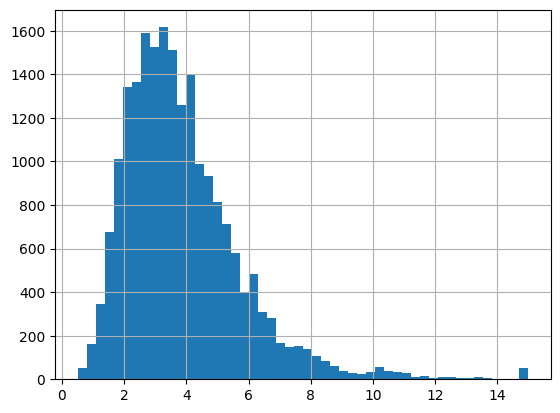

In [220]:
housing_df.median_income.hist(bins=50)

In [222]:
housing_df["income_cat"] = pd.cut(housing_df["median_income"],
      bins=[0,1.5,3.0,4.5,6.0,np.inf],
      labels=[1,2,3,4,5])

In [224]:
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


**Sorting indexes:**

using `df.sort_index()`

In [230]:
df = car_df.sample(10)

In [231]:
df

,Make,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
10250,Chevrolet,2013,regular unleaded,332.0,8.0,automatic,four wheel drive,4.0,"Luxury,Hybrid",Large,4dr SUV,23,20,1385,56425
10973,Toyota,2016,regular unleaded,310.0,8.0,automatic,four wheel drive,4.0,NaN,Large,Crew Cab Pickup,18,14,2031,36320
10660,Ford,2016,regular unleaded,169.0,4.0,automatic,front wheel drive,4.0,NaN,Compact,Cargo Minivan,29,21,5657,22675
10384,Ford,2005,premium unleaded (required),280.0,8.0,automatic,rear wheel drive,2.0,Performance,Midsize,Convertible,22,16,5657,39415
3983,Buick,2017,premium unleaded (recommended),252.0,4.0,automatic,all wheel drive,4.0,Crossover,Midsize,4dr SUV,26,20,155,42320
8921,Volvo,1998,regular unleaded,236.0,5.0,manual,front wheel drive,4.0,"Luxury,Performance",Midsize,Sedan,23,17,870,2232
458,Mercedes-Benz,1990,regular unleaded,201.0,8.0,automatic,rear wheel drive,4.0,Luxury,Large,Sedan,17,14,617,2000
114,Mazda,2012,regular unleaded,100.0,4.0,automatic,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,34,28,586,16860
7071,Ford,2015,regular unleaded,300.0,6.0,manual,rear wheel drive,2.0,Performance,Midsize,Convertible,28,17,5657,29300
4986,Nissan,2016,regular unleaded,261.0,6.0,automatic,rear wheel drive,4.0,NaN,Compact,Extended Cab Pickup,22,16,2009,24520


In [232]:
df.sort_index() #returns a copy/new dataframe with index sorted.

,Make,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
114,Mazda,2012,regular unleaded,100.0,4.0,automatic,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,34,28,586,16860
458,Mercedes-Benz,1990,regular unleaded,201.0,8.0,automatic,rear wheel drive,4.0,Luxury,Large,Sedan,17,14,617,2000
3983,Buick,2017,premium unleaded (recommended),252.0,4.0,automatic,all wheel drive,4.0,Crossover,Midsize,4dr SUV,26,20,155,42320
4986,Nissan,2016,regular unleaded,261.0,6.0,automatic,rear wheel drive,4.0,NaN,Compact,Extended Cab Pickup,22,16,2009,24520
7071,Ford,2015,regular unleaded,300.0,6.0,manual,rear wheel drive,2.0,Performance,Midsize,Convertible,28,17,5657,29300
8921,Volvo,1998,regular unleaded,236.0,5.0,manual,front wheel drive,4.0,"Luxury,Performance",Midsize,Sedan,23,17,870,2232
10250,Chevrolet,2013,regular unleaded,332.0,8.0,automatic,four wheel drive,4.0,"Luxury,Hybrid",Large,4dr SUV,23,20,1385,56425
10384,Ford,2005,premium unleaded (required),280.0,8.0,automatic,rear wheel drive,2.0,Performance,Midsize,Convertible,22,16,5657,39415
10660,Ford,2016,regular unleaded,169.0,4.0,automatic,front wheel drive,4.0,NaN,Compact,Cargo Minivan,29,21,5657,22675
10973,Toyota,2016,regular unleaded,310.0,8.0,automatic,four wheel drive,4.0,NaN,Large,Crew Cab Pickup,18,14,2031,36320


In [234]:
df.sort_index(inplace=True)

In [235]:
df

,Make,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
114,Mazda,2012,regular unleaded,100.0,4.0,automatic,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,34,28,586,16860
458,Mercedes-Benz,1990,regular unleaded,201.0,8.0,automatic,rear wheel drive,4.0,Luxury,Large,Sedan,17,14,617,2000
3983,Buick,2017,premium unleaded (recommended),252.0,4.0,automatic,all wheel drive,4.0,Crossover,Midsize,4dr SUV,26,20,155,42320
4986,Nissan,2016,regular unleaded,261.0,6.0,automatic,rear wheel drive,4.0,NaN,Compact,Extended Cab Pickup,22,16,2009,24520
7071,Ford,2015,regular unleaded,300.0,6.0,manual,rear wheel drive,2.0,Performance,Midsize,Convertible,28,17,5657,29300
8921,Volvo,1998,regular unleaded,236.0,5.0,manual,front wheel drive,4.0,"Luxury,Performance",Midsize,Sedan,23,17,870,2232
10250,Chevrolet,2013,regular unleaded,332.0,8.0,automatic,four wheel drive,4.0,"Luxury,Hybrid",Large,4dr SUV,23,20,1385,56425
10384,Ford,2005,premium unleaded (required),280.0,8.0,automatic,rear wheel drive,2.0,Performance,Midsize,Convertible,22,16,5657,39415
10660,Ford,2016,regular unleaded,169.0,4.0,automatic,front wheel drive,4.0,NaN,Compact,Cargo Minivan,29,21,5657,22675
10973,Toyota,2016,regular unleaded,310.0,8.0,automatic,four wheel drive,4.0,NaN,Large,Crew Cab Pickup,18,14,2031,36320


In [238]:
brics_df = pd.read_csv('datasets/brics.csv', index_col=0)

In [239]:
brics_df

,country,capital,area,population
BR,Brazil,Brasilia,8.516,200.40
RU,Russia,Moscow,17.100,143.50
IN,India,New Delhi,3.286,1252.00
CH,China,Beijing,9.597,1357.00
SA,South Africa,Pretoria,1.221,52.98


In [241]:
brics_df.sort_index() #string index, therefore sorted alphabetically

,country,capital,area,population
BR,Brazil,Brasilia,8.516,200.40
CH,China,Beijing,9.597,1357.00
IN,India,New Delhi,3.286,1252.00
RU,Russia,Moscow,17.100,143.50
SA,South Africa,Pretoria,1.221,52.98


#### get first n rows of data in sorted order:

Get the rows of a DataFrame sorted by the n largest values of columns.
```
>>>df.nlargest(n, columns, keep='first')
```
```
Parameters:	n : int
                    Number of items to retrieve
            columns : list or str
                    Column name or names to order by
            keep : {‘first’, ‘last’, False}, default ‘first’
                    Where there are duplicate values: - first : take the first occurrence. - last : take the last occurrence.
Returns:	DataFrame
```

In [245]:
covid_df.nlargest(5,"new_cases", keep='first')

,date,new_cases,new_deaths,new_tests
82,2020-03-22,6557.0,795.0,NaN
87,2020-03-27,6153.0,660.0,NaN
81,2020-03-21,5986.0,625.0,NaN
89,2020-03-29,5974.0,887.0,NaN
88,2020-03-28,5959.0,971.0,NaN


In [248]:
covid_df.date = pd.to_datetime(covid_df.date)

In [250]:
covid_df.nlargest(5,"date")

,date,new_cases,new_deaths,new_tests
247,2020-09-03,1326.0,6.0,NaN
246,2020-09-02,975.0,8.0,NaN
245,2020-09-01,996.0,6.0,54395.0
244,2020-08-31,1365.0,4.0,42583.0
243,2020-08-30,1444.0,1.0,53541.0


**NOTE**: this is very helpful when you are working with **time series data** and you want the latest 10 records for example. Then, df.nlargest(10, “date”) will do the job. Note that date should be a datetime datatype column.

**NOTE**:  in datetime dtype, the more recent dates are larger than older dates.


### Missing values:

In [48]:
car_df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [50]:
car_df.isnull() # returns a boolean dataframe with True at null locations

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
11910,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
11911,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
11912,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [51]:
car_df.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

**NOTE**: `df.isna()` and `df.isnull()` both do the same thing.

If you ever want to give null values to certain i,j entries just put np.nan in place of a real value.
Ex:


In [55]:
r = np.array([1,2,3,4,np.nan, 5, np.nan, 9])

In [56]:
r

array([ 1.,  2.,  3.,  4., nan,  5., nan,  9.])

In [60]:
r[-2], type(r[-2]) # nan comes under float64 class

(nan, numpy.float64)

In [62]:
a = pd.Series(r)

In [63]:
a

0    1.0
1    2.0
2    3.0
3    4.0
4    NaN
5    5.0
6    NaN
7    9.0
dtype: float64

In [65]:
a[6], type(a[6])

(nan, numpy.float64)

**NOTE**: Instead of doing `.isna().sum()` to find no. of missing values in each column you can also chain `.isna()` with `.any()` which returns True if there is atleast 1 missing value in that column.

In [72]:
car_df.isna().any()
# jis column me ek bhi null value hai then .any() will return True. haan hai
# understand that .isna() converted the df into boolean dataframe and then
# .any() looked for atleast 1 True in each column. if found, then returned True for that column
# else False

Make                 False
Model                False
Year                 False
Engine Fuel Type      True
Engine HP             True
Engine Cylinders      True
Transmission Type    False
Driven_Wheels        False
Number of Doors       True
Market Category       True
Vehicle Size         False
Vehicle Style        False
highway MPG          False
city mpg             False
Popularity           False
MSRP                 False
dtype: bool

In [75]:
car_df.any()
# since df.any() returns True if atleast 1 value is True in a column
# and we know that non-zero or non-empty strings are considered True in python
# hence all the columns were returned as True because har column me ek na ek non-null value to 
# hai hi. koyi bhi column esa nahi tha jisme sirf null hi values ho.

Make                 True
Model                True
Year                 True
Engine Fuel Type     True
Engine HP            True
Engine Cylinders     True
Transmission Type    True
Driven_Wheels        True
Number of Doors      True
Market Category      True
Vehicle Size         True
Vehicle Style        True
highway MPG          True
city mpg             True
Popularity           True
MSRP                 True
dtype: bool

**Note**: that `any()` is a python function that can be run on any iterable and it returns **true if there is atleast 1 true value in the iterable**.

In [76]:
any([1, 0, -1, False]) # returns True

True

In [77]:
any([0, 0, False, '']) # returns False

False

**Dropping rows:**

`.dropna()` drops any row with atleast 1 null value. 

In [85]:
car_df.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [86]:
car_df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [91]:
car_df.dropna()
# notice how original dataframe had 11914 rows. but this one has only 8084 rows.
# columns remain the same

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


**NOTE**: that this returns a copy. the original dataframe is still the same

**NOTE**: however, this may not be ideal if you have a lot of missing data, since that means losing a lot of observations.

You can also choose to drop columns if there is a missing value in a column by `axis=1` as the parameter to `.dropna()`

In [94]:
car_df.dropna(axis=1)
# notice the no. of columns has reduced.

,Make,Model,Year,Transmission Type,Driven_Wheels,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,AUTOMATIC,all wheel drive,Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,AUTOMATIC,all wheel drive,Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,AUTOMATIC,all wheel drive,Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,AUTOMATIC,all wheel drive,Midsize,4dr Hatchback,23,16,204,50920


**Filling missing values in pandas:**

using `df.fillna()`

You can use `df.fillna(value)` to fill all null values with the value. The value can be zero or some kind of summary statistic like mean, median, etc.   
However, when you replace missing values, you make assumptions about what a missing value means. 

**IMPORTANT:**

when filling missing values in a dataset or column, always create a histogram before filling missing values and after filling missing values and see how the distribution changes.


In [104]:
covid_df.head()

,date,new_cases,new_deaths,new_tests,positivity_rate
0,2019-12-31,0.0,0.0,NaN,NaN
1,2020-01-01,0.0,0.0,NaN,NaN
2,2020-01-02,0.0,0.0,NaN,NaN
3,2020-01-03,0.0,0.0,NaN,NaN
4,2020-01-04,0.0,0.0,NaN,NaN


In [108]:
covid_df.info()
# we find that there are null values in new_tests column and positivity_rate column.
# infact positivity_rate column is made using new_tests and new_cases and
# since new_cases has no null values, the null values in positivity_rate is directly due to
# new_tests column and hence there are same no. of null values in both. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             248 non-null    object 
 1   new_cases        248 non-null    float64
 2   new_deaths       248 non-null    float64
 3   new_tests        135 non-null    float64
 4   positivity_rate  135 non-null    float64
dtypes: float64(4), object(1)
memory usage: 9.8+ KB


In [110]:
covid_df['new_tests'].fillna(0)
# you can set inplace=True parameter in fillna() or reassign this result to covid_df['new_tests']

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
        ...   
243    53541.0
244    42583.0
245    54395.0
246        0.0
247        0.0
Name: new_tests, Length: 248, dtype: float64

**Changing Boolean series to int series:**

In [111]:
car_df['Number of Doors'] == 2

0         True
1         True
2         True
3         True
4         True
         ...  
11909    False
11910    False
11911    False
11912    False
11913    False
Name: Number of Doors, Length: 11914, dtype: bool

**NOTICE** the dtype is **bool**

In [112]:
(car_df['Number of Doors'] == 2).astype('int')

0        1
1        1
2        1
3        1
4        1
        ..
11909    0
11910    0
11911    0
11912    0
11913    0
Name: Number of Doors, Length: 11914, dtype: int32

In [114]:
# or
(car_df['Number of Doors'] == 2).astype(int)
# notice int is not passed as a string here but still works because int is nothing
# but a python class

0        1
1        1
2        1
3        1
4        1
        ..
11909    0
11910    0
11911    0
11912    0
11913    0
Name: Number of Doors, Length: 11914, dtype: int32

In [122]:
(car_df['Number of Doors'] == 2).astype(np.int8)
# dtype is set to int8

0        1
1        1
2        1
3        1
4        1
        ..
11909    0
11910    0
11911    0
11912    0
11913    0
Name: Number of Doors, Length: 11914, dtype: int8

In [128]:
car_df[car_df['Number of Doors'] == 2]

,Make,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11901,BMW,2016,premium unleaded (required),240.0,4.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,34,22,3916,49700
11902,BMW,2016,premium unleaded (required),335.0,6.0,AUTOMATED_MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Convertible,24,17,3916,66350
11903,BMW,2001,premium unleaded (required),394.0,8.0,MANUAL,rear wheel drive,2.0,"Exotic,Luxury,High-Performance",Compact,Convertible,19,12,3916,128000
11904,BMW,2002,premium unleaded (required),394.0,8.0,MANUAL,rear wheel drive,2.0,"Exotic,Luxury,High-Performance",Compact,Convertible,19,12,3916,130000


In [126]:
car_df[(car_df['Number of Doors'] == 2).astype(np.int8)]

KeyError: "None of [Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,\n       ...\n       1, 1, 0, 0, 0, 0, 0, 0, 0, 0],\n      dtype='int8', length=11914)] are in the [columns]"

In [130]:
car_df.loc[(car_df['Number of Doors'] == 2)]

,Make,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11901,BMW,2016,premium unleaded (required),240.0,4.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,34,22,3916,49700
11902,BMW,2016,premium unleaded (required),335.0,6.0,AUTOMATED_MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Convertible,24,17,3916,66350
11903,BMW,2001,premium unleaded (required),394.0,8.0,MANUAL,rear wheel drive,2.0,"Exotic,Luxury,High-Performance",Compact,Convertible,19,12,3916,128000
11904,BMW,2002,premium unleaded (required),394.0,8.0,MANUAL,rear wheel drive,2.0,"Exotic,Luxury,High-Performance",Compact,Convertible,19,12,3916,130000


**So, filtering only works with boolean series, you cannot pass series of integers 0 and 1 and get the same result.** 

**Summarizing categorical data using counting:**

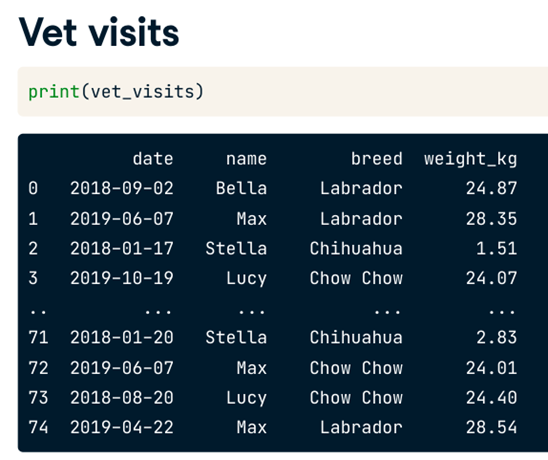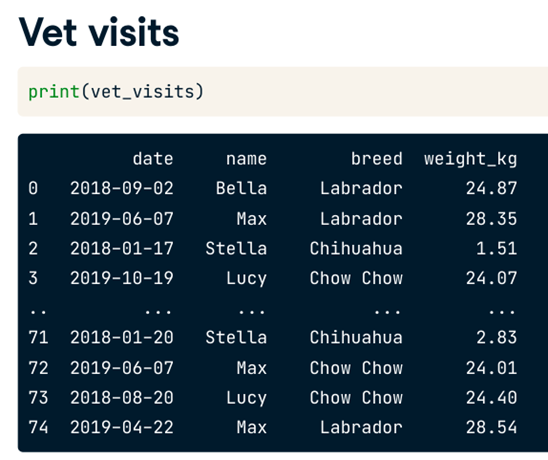

**Q.** How many dogs of each breed have visited the vet??

First, look at instances such as Stella and Max, they are repeating because they had multiple visits to the vet.
Therefore, we need to first remove the duplicate entries. And then find the no. of times each breed occurs in the breed column (`df['breed'].value_counts()`)


Now, you could drop just the duplicate names and not consider the breed column. But then, there could be 2 dogs with the same name but different breed. Therefore, it have to consider both name and breed column when removing duplicate (repeating) entries.
```
unique_dogs = vet_visits.drop_duplicates(subset=['name', 'breed'])
```

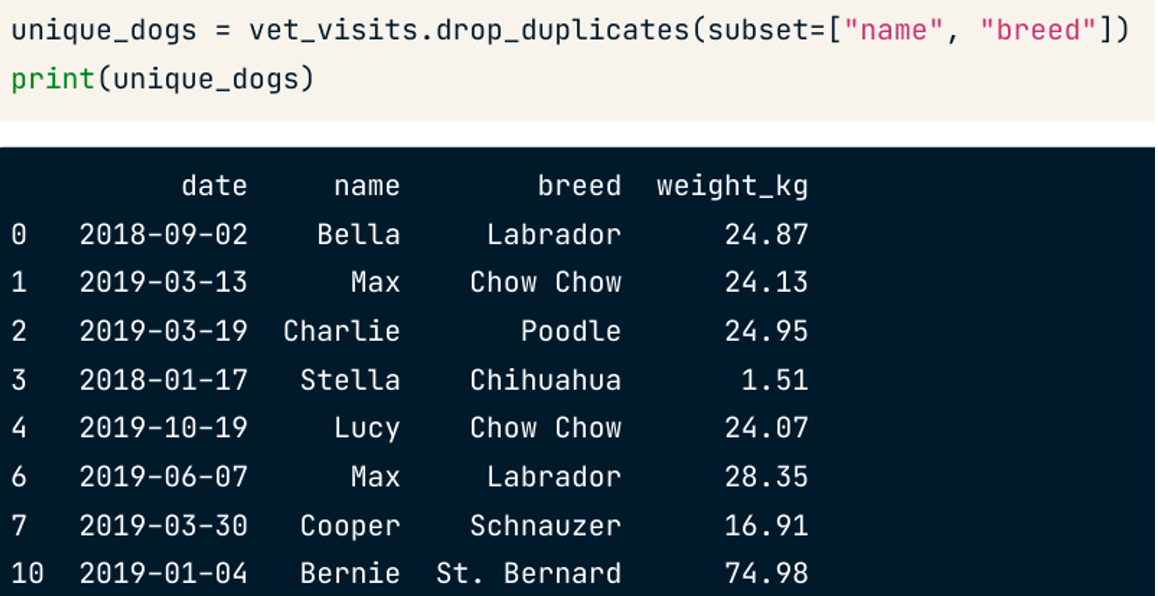

Now, count the no. of occurences of each breed in the breed column.
```
>>>unique_dogs['breed'].value_counts()
```
give parameter sort=True to sort the result in descending order.
```
>>>unique_dogs['breed'].value_counts(sort=True)
```

### Concatenating 2 dataframes

using `pd.concat()`

In [144]:
df1 = pd.DataFrame(np.random.randint(100, size=(3,2)), columns=['fir', 'sec'])

In [145]:
df1

,fir,sec
0,8,88
1,76,89
2,48,18


In [146]:
df2 = pd.DataFrame(np.random.randint(100, size=(4,2)), columns=['fir', 'sec'])

In [147]:
df2

,fir,sec
0,44,18
1,30,61
2,95,76
3,64,57


In [149]:
df_full = pd.concat([df1, df2])

In [151]:
df_full

,fir,sec
0,8,88
1,76,89
2,48,18
0,44,18
1,30,61
2,95,76
3,64,57


**NOTE**: `pd.concat()` has `axis` parameter which is = 0 by default. Therefore it concatenates vertically or across rows by default.

**NOTE**: **IMPORTANT**: the column names of the dfs being concatenated MUST be same.
If the column names are same but the column order is different in both the dataframes, then values will concatenated based on the matching column name. see example below

In [154]:
df3 = pd.DataFrame(np.random.randint(100, size=(4,2)), columns=['sec', 'fir'])
# column names order changed

In [155]:
df3

,sec,fir
0,49,79
1,26,7
2,90,8
3,29,74


In [156]:
pd.concat([df1, df3])

,fir,sec
0,8,88
1,76,89
2,48,18
0,79,49
1,7,26
2,8,90
3,74,29


**NOTICE:** even though fir was the 2nd column in the df3, pandas understood that 1st column fir of df1 should be concatenated with fir column of df3 even though its not directly below according to df1 column ordering.

**NOTE**: The indexes of the individual dataframes will be retained.

In [158]:
df_full

,fir,sec
0,8,88
1,76,89
2,48,18
0,44,18
1,30,61
2,95,76
3,64,57


In [160]:
df_full.loc[2]

,fir,sec
2,48,18
2,95,76


This shows that indexes of a dataframe **DO NOT necessarily** have to be unique for pandas to accept it.

If original indexes of the individual dataframes do not matter, you can pass the `ignore_index=True` argument.

In [157]:
pd.concat([df1, df3], ignore_index=True)

,fir,sec
0,8,88
1,76,89
2,48,18
3,79,49
4,7,26
5,8,90
6,74,29


If you want to give some labels to each of the table being concatenated, pass the labels as of a list of strings to `keys` argument.

**NOTE** that when passing `keys` argument, `ignore_index` MUST be False. You cant ignore index and give key at the same time.

In [168]:
pd.concat([df1, df2], keys=['jan', 'feb'])
# resulting dataframe has multi-index

fir  sec
jan 0    8   88
    1   76   89
    2   48   18
feb 0   44   18
    1   30   61
    2   95   76
    3   64   57

In [167]:
pd.concat([df1, df2], keys=['jan', 'feb'], ignore_index=True)
# it ignored your explicit keys as well

,fir,sec
0,8,88
1,76,89
2,48,18
3,44,18
4,30,61
5,95,76
6,64,57


**NOTE**: **IMPORTANT** if column names are different then also pd.concat() will not give error. Instead it will place NULL values in the rows which belonged to the df without that column. i.e. The concat method by default will include all of the columns in the different tables it's combining.

In [178]:
df1 = pd.DataFrame(np.random.randint(100, size=(3,2)), columns=['zac', 'sec'])
df2 = pd.DataFrame(np.random.randint(100, size=(4,2)), columns=['sec', 'xyz'])

In [179]:
df1

,zac,sec
0,7,52
1,84,54
2,83,49


In [180]:
df2

,sec,xyz
0,71,11
1,60,23
2,63,99
3,74,32


In [181]:
pd.concat([df1, df2])

,zac,sec,xyz
0,7.0,52,NaN
1,84.0,54,NaN
2,83.0,49,NaN
0,NaN,71,11.0
1,NaN,60,23.0
2,NaN,63,99.0
3,NaN,74,32.0


If you want the resulting dataframe to have columns sorted alphabetically, then pass `sort=True`

In [182]:
pd.concat([df1, df2], sort=True)

,sec,xyz,zac
0,52,NaN,7.0
1,54,NaN,84.0
2,49,NaN,83.0
0,71,11.0,NaN
1,60,23.0,NaN
2,63,99.0,NaN
3,74,32.0,NaN


**NOTE**: If we only want the matching columns between tables, we set the `join` argument to "inner". Its default value is equal to "outer", which is why concat by default will include all of the columns.
Additionally, the sort argument has no effect when join equals "inner". The order of the columns will be the same as the input tables.


In [176]:
pd.concat([df1, df2], join="inner")

,sec
0,81
1,27
2,96
0,15
1,33
2,29
3,36


**verifying integrity in concat():**

Check whether the new concatenated index contains duplicates.

```
.concat(verify_integrity=False)
```
by default, it is set to False

However, if set to True, it will check if there are duplicate values in the index and raise an error if there are. **It will only check the index values and not the columns.**

In [188]:
df1

,zac,sec
0,7,52
1,84,54
2,83,49


In [189]:
df2

,sec,xyz
0,71,11
1,60,23
2,63,99
3,74,32


In [191]:
pd.concat([df1, df2], verify_integrity=True)
# gives error as indexes of df1 are appearing again in df2. 

ValueError: Indexes have overlapping values: Index([0, 1, 2], dtype='int64')

**Q. Why verify integrity ?**
- real world data is often NOT clean. and it may not always be evident if data has the expected structure. Therefore, verifying this structure is useful, saving us from having a mean skewed by duplicate values, or from creating inaccurate plots.

If you receive a MergeError or a ValueError, you can fix the incorrect data or drop duplicate rows. In general, you should look to correct the issue.


**Converting a string series to numeric:**

using `pd.to_numeric()`

This can happen often when importing data from csv files because data is stored as strings and not numbers.

ex: '14.53', '234.65', '0.0', '345.22'

In [192]:
d = {'fir': ['34.56', '0', ' ', '-56.78']}

In [193]:
df = pd.DataFrame(d)

In [194]:
df

,fir
0,34.56
1,0
2,
3,-56.78


In [198]:
df.dtypes

fir    object
dtype: object

In [200]:
df.isnull() # notice the ' ' element is not treated as a null value.

,fir
0,False
1,False
2,False
3,False


Now we want to convert this column to a numeric column.

In [202]:
pd.to_numeric(df['fir'])
# Value error as ' ' cannot be converted to a number

ValueError: Unable to parse string " " at position 2

In [206]:
pd.to_numeric(df['fir'], errors='coerce')
# notice the ' ' element cannot be converted into a number and therefore treated as NULL
# so errors='coerce' fills NaN in all places where parsing error occurs
# when converting string to numeric.

0    34.56
1     0.00
2      NaN
3   -56.78
Name: fir, dtype: float64

### Working with dates and datetime objects

In [219]:
covid_df.dtypes

date                object
new_cases          float64
new_deaths         float64
new_tests          float64
positivity_rate    float64
dtype: object

In [220]:
covid_df.at[120, 'date']

'2020-04-29'

When your date column is a string dtype(object), pandas does not know that its a date column and hence is unable to provide you with functions for manipulating dates for your analysis.

In [222]:
covid_df.date = pd.to_datetime(covid_df['date'])

In [223]:
covid_df.date

0     2019-12-31
1     2020-01-01
2     2020-01-02
3     2020-01-03
4     2020-01-04
         ...    
243   2020-08-30
244   2020-08-31
245   2020-09-01
246   2020-09-02
247   2020-09-03
Name: date, Length: 248, dtype: datetime64[ns]

NOTICE dtype is now `datetime64[ns]`

ns implies it can take values upto nano-seconds

you can parse dates at the time of import using `parse_dates` parameter in `pd.read_csv()`

In [229]:
covid_df_dt = pd.read_csv('datasets/italy-covid-daywise.csv', parse_dates=[0])
# parses column 0 as a datetime column

In [230]:
covid_df_dt.head()

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN


In [232]:
covid_df_dt.dtypes

date          datetime64[ns]
new_cases            float64
new_deaths           float64
new_tests            float64
dtype: object

In [236]:
covid_df_dt_index = pd.read_csv('datasets/italy-covid-daywise.csv',
                                index_col=0, parse_dates=True)
# parses the defined index column as a date column. 

In [237]:
covid_df_dt_index.head()

,new_cases,new_deaths,new_tests
date,,,
2019-12-31,0.0,0.0,NaN
2020-01-01,0.0,0.0,NaN
2020-01-02,0.0,0.0,NaN
2020-01-03,0.0,0.0,NaN
2020-01-04,0.0,0.0,NaN


In [238]:
covid_df_dt_index.index

DatetimeIndex(['2019-12-31', '2020-01-01', '2020-01-02', '2020-01-03',
               '2020-01-04', '2020-01-05', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09',
               ...
               '2020-08-25', '2020-08-26', '2020-08-27', '2020-08-28',
               '2020-08-29', '2020-08-30', '2020-08-31', '2020-09-01',
               '2020-09-02', '2020-09-03'],
              dtype='datetime64[ns]', name='date', length=248, freq=None)

While we've looked at overall numbers for the cases, tests, positive rate, etc., it would also be useful to study these numbers on a month-by-month basis. The date column might come in handy here, as Pandas provides many utilities for working with dates.

In [245]:
covid_df

,date,new_cases,new_deaths,new_tests,positivity_rate
0,2019-12-31,0.0,0.0,NaN,NaN
1,2020-01-01,0.0,0.0,NaN,NaN
2,2020-01-02,0.0,0.0,NaN,NaN
3,2020-01-03,0.0,0.0,NaN,NaN
4,2020-01-04,0.0,0.0,NaN,NaN
...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,0.026970
244,2020-08-31,1365.0,4.0,42583.0,0.032055
245,2020-09-01,996.0,6.0,54395.0,0.018311
246,2020-09-02,975.0,8.0,NaN,NaN


In [246]:
covid_df.dtypes

date               datetime64[ns]
new_cases                 float64
new_deaths                float64
new_tests                 float64
positivity_rate           float64
dtype: object

You can see that it now has the datatype datetime64. We can now extract different parts of the data into separate columns, using the `DatetimeIndex` class.

In [249]:
pd.DatetimeIndex(covid_df.date)

DatetimeIndex(['2019-12-31', '2020-01-01', '2020-01-02', '2020-01-03',
               '2020-01-04', '2020-01-05', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09',
               ...
               '2020-08-25', '2020-08-26', '2020-08-27', '2020-08-28',
               '2020-08-29', '2020-08-30', '2020-08-31', '2020-09-01',
               '2020-09-02', '2020-09-03'],
              dtype='datetime64[ns]', name='date', length=248, freq=None)

In [250]:
pd.DatetimeIndex(covid_df.date).year

Index([2019, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020,
       ...
       2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020],
      dtype='int32', name='date', length=248)

In [251]:
pd.DatetimeIndex(covid_df.date).month

Index([12,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       ...
        8,  8,  8,  8,  8,  8,  8,  9,  9,  9],
      dtype='int32', name='date', length=248)

In [252]:
covid_df['year'] = pd.DatetimeIndex(covid_df.date).year
covid_df['month'] = pd.DatetimeIndex(covid_df.date).month

In [254]:
covid_df['weekday'] = pd.DatetimeIndex(covid_df.date).weekday

In [256]:
covid_df['day'] = pd.DatetimeIndex(covid_df.date).day

In [257]:
covid_df.head()

,date,new_cases,new_deaths,new_tests,positivity_rate,year,month,weekday,day
0,2019-12-31,0.0,0.0,NaN,NaN,2019,12,1,31
1,2020-01-01,0.0,0.0,NaN,NaN,2020,1,2,1
2,2020-01-02,0.0,0.0,NaN,NaN,2020,1,3,2
3,2020-01-03,0.0,0.0,NaN,NaN,2020,1,4,3
4,2020-01-04,0.0,0.0,NaN,NaN,2020,1,5,4


Weekday is the weekdays Monday to Sunday. Monday is 0, tue =1 and so on till Sunday=6


**NOTE**:
```
>>>r = pd.DatetimeIndex(covid_df.date).month
>>>type(r)   #returns
<class 'pandas.core.indexes.numeric.Int64Index'>
```
BUT,
```
>>>covid_df['month'] = pd.DatetimeIndex(covid_df.date).month
>>>type(covid_df['month']) #returns Series datatype of pandas.
<class 'pandas.core.series.Series'>
```

Therefore the moment you add something to a dataframe as a column it becomes a Series datatype. That’s what pandas does internally.

Let's check the overall metrics for May. We can query the rows for May, choose a subset of columns, and use the sum method to aggregate each selected column's values.

In [260]:
covid_df[covid_df.month == 5][['new_cases', 'new_deaths', 'new_tests']].sum()

new_cases       29073.0
new_deaths       5658.0
new_tests     1078720.0
dtype: float64

As another example, let's check if the number of cases reported on Sundays is higher than the average number of cases reported every day.

In [266]:
covid_df[covid_df.weekday == 6][['new_cases', 'new_deaths', 'new_tests']].mean()

new_cases      1247.257143
new_deaths      159.457143
new_tests     28588.105263
dtype: float64

In [267]:
covid_df[~(covid_df.weekday == 6)][['new_cases', 'new_deaths', 'new_tests']].mean()

new_cases      1069.769953
new_deaths      140.450704
new_tests     32209.327586
dtype: float64

new_cases are reported more on Sundays than non-sundays

In [268]:
covid_df[(covid_df.weekday != 6)][['new_cases', 'new_deaths', 'new_tests']].mean()

new_cases      1069.769953
new_deaths      140.450704
new_tests     32209.327586
dtype: float64

In [271]:
covid_df[['new_cases', 'new_deaths', 'new_tests']].mean()

new_cases      1094.818548
new_deaths      143.133065
new_tests     31699.674074
dtype: float64

new cases on sundays are higher than the overall average.

### Grouping and aggregation

As a next step, we might want to summarize the day-wise data and create a new dataframe with month-wise data. We can use the groupby function to create a group for each month, select the columns we wish to aggregate, and aggregate them using the sum method.

This is called **granularity** of data. So combining data in minutes to be represented in hours , or days combined to be represented as month data. But if you collect data of larger time frame then you cannot construct from that larger time frame to smaller time frame data. Ex: Obviously you cannot go back from hours data to minutes or monthly data to become day wise data.

In [275]:
covid_df.groupby('month')[['new_cases', 'new_deaths', 'new_tests']].sum()

,new_cases,new_deaths,new_tests
month,,,
1,3.0,0.0,0.0
2,885.0,21.0,0.0
3,100851.0,11570.0,0.0
4,101852.0,16091.0,419591.0
5,29073.0,5658.0,1078720.0
6,7772.0,1404.0,830354.0
7,6722.0,388.0,797692.0
8,21060.0,345.0,1098704.0
9,3297.0,20.0,54395.0


NOTICE the column/columns passed in the groupby() become the index in the resulting dataframe

So we can see that the cases increased drastically in march and april and then slowly came down, but again in august there is an increase indicating a 2nd wave.


This is the whole point of data analysis. Moving data around in an intelligent fashion to be able to make better inferences from the data while the underlying data remains the same. And this may be achieved by grouping, aggregating, merging, adding new columns, sorting etc.

Once you make these inferences from the data, **you HAVE TO ASK THE WHY????** Find the reason why the data is such and such. You might make some guesses but you should indulge in some research into the reasons and maybe your guess was right or wrong in the end.

And these inferences can be made much more quickly and intuitively by plotting graphs of the data which we will cover next.

Let's compute the average number of daily new cases, deaths, and tests for each month.

In [281]:
covid_df.groupby('month')[['new_cases', 'new_deaths', 'new_tests']].mean()

,new_cases,new_deaths,new_tests
month,,,
1,0.096774,0.000000,NaN
2,30.517241,0.724138,NaN
3,3253.258065,373.225806,NaN
4,3395.066667,536.366667,38144.636364
5,937.838710,182.516129,34797.419355
6,259.066667,46.800000,27678.466667
7,216.838710,12.516129,25732.000000
8,679.354839,11.129032,35442.064516
9,1099.000000,6.666667,54395.000000


In [282]:
covid_df.groupby(['year', 'month'])[['new_cases', 'new_deaths', 'new_tests']].mean()

new_cases  new_deaths     new_tests
year month                                       
2019 12        0.000000    0.000000           NaN
2020 1         0.096774    0.000000           NaN
     2        30.517241    0.724138           NaN
     3      3253.258065  373.225806           NaN
     4      3395.066667  536.366667  38144.636364
     5       937.838710  182.516129  34797.419355
     6       259.066667   46.800000  27678.466667
     7       216.838710   12.516129  25732.000000
     8       679.354839   11.129032  35442.064516
     9      1099.000000    6.666667  54395.000000

Apart from grouping, another form of aggregation is the running or cumulative sum of cases, tests, or death up to each row's date. We can use the cumsum method to compute the cumulative sum of a column as a new series. Let's add three new columns: `total_cases`, `total_deaths`, and `total_tests`.


In [284]:
covid_df['total_cases'] = covid_df.new_cases.cumsum()

In [286]:
covid_df['total_deaths'] = covid_df.new_deaths.cumsum()

In [287]:
covid_df['total_tests'] = covid_df.new_tests.cumsum()

In [294]:
covid_df.head()

,date,new_cases,new_deaths,new_tests,positivity_rate,year,month,weekday,day,total_cases,total_deaths,total_tests
0,2019-12-31,0.0,0.0,NaN,NaN,2019,12,1,31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN,NaN,2020,1,2,1,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN,NaN,2020,1,3,2,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN,NaN,2020,1,4,3,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN,NaN,2020,1,5,4,0.0,0.0,NaN


Notice how the NaN values in the total_tests column remain unaffected.

In [293]:
covid_df.loc[120:125, :]

,date,new_cases,new_deaths,new_tests,positivity_rate,year,month,weekday,day,total_cases,total_deaths,total_tests
120,2020-04-29,2091.0,382.0,38589.0,0.054186,2020,4,2,29,201505.0,27359.0,378150.0
121,2020-04-30,2086.0,323.0,41441.0,0.050337,2020,4,3,30,203591.0,27682.0,419591.0
122,2020-05-01,1872.0,285.0,43732.0,0.042806,2020,5,4,1,205463.0,27967.0,463323.0
123,2020-05-02,1965.0,269.0,31231.0,0.062918,2020,5,5,2,207428.0,28236.0,494554.0
124,2020-05-03,1900.0,474.0,27047.0,0.070248,2020,5,6,3,209328.0,28710.0,521601.0
125,2020-05-04,1389.0,174.0,22999.0,0.060394,2020,5,0,4,210717.0,28884.0,544600.0


In [296]:
# using .agg() to calculate multiple aggregations in one go.
covid_df.groupby(['year', 'month'])[['new_cases', 'new_deaths', 'new_tests']].agg(['mean', 'count'])

new_cases        new_deaths           new_tests      
                   mean count        mean count          mean count
year month                                                         
2019 12        0.000000     1    0.000000     1           NaN     0
2020 1         0.096774    31    0.000000    31           NaN     0
     2        30.517241    29    0.724138    29           NaN     0
     3      3253.258065    31  373.225806    31           NaN     0
     4      3395.066667    30  536.366667    30  38144.636364    11
     5       937.838710    31  182.516129    31  34797.419355    31
     6       259.066667    30   46.800000    30  27678.466667    30
     7       216.838710    31   12.516129    31  25732.000000    31
     8       679.354839    31   11.129032    31  35442.064516    31
     9      1099.000000     3    6.666667     3  54395.000000     1

**getting numpy arrays from pandas:** 

In [22]:
df = pd.read_csv('datasets/brics.csv', index_col=0)

In [23]:
df

,country,capital,area,population
BR,Brazil,Brasilia,8.516,200.40
RU,Russia,Moscow,17.100,143.50
IN,India,New Delhi,3.286,1252.00
CH,China,Beijing,9.597,1357.00
SA,South Africa,Pretoria,1.221,52.98


In [24]:
df['country'].values

array(['Brazil', 'Russia', 'India', 'China', 'South Africa'], dtype=object)

In [26]:
df.area.values

array([ 8.516, 17.1  ,  3.286,  9.597,  1.221])

**converting a dataframe into a dictionary**

In [30]:
df.to_dict()

{'country': {'BR': 'Brazil',
  'RU': 'Russia',
  'IN': 'India',
  'CH': 'China',
  'SA': 'South Africa'},
 'capital': {'BR': 'Brasilia',
  'RU': 'Moscow',
  'IN': 'New Delhi',
  'CH': 'Beijing',
  'SA': 'Pretoria'},
 'area': {'BR': 8.516, 'RU': 17.1, 'IN': 3.286, 'CH': 9.597, 'SA': 1.221},
 'population': {'BR': 200.4,
  'RU': 143.5,
  'IN': 1252.0,
  'CH': 1357.0,
  'SA': 52.98}}

In [31]:
covid_df = pd.read_csv('datasets/italy-covid-daywise.csv')

In [33]:
covid_df.head().to_dict()

{'date': {0: '2019-12-31',
  1: '2020-01-01',
  2: '2020-01-02',
  3: '2020-01-03',
  4: '2020-01-04'},
 'new_cases': {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0},
 'new_deaths': {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0},
 'new_tests': {0: nan, 1: nan, 2: nan, 3: nan, 4: nan}}

In [34]:
df.to_dict(orient='records')

[{'country': 'Brazil',
  'capital': 'Brasilia',
  'area': 8.516,
  'population': 200.4},
 {'country': 'Russia', 'capital': 'Moscow', 'area': 17.1, 'population': 143.5},
 {'country': 'India',
  'capital': 'New Delhi',
  'area': 3.286,
  'population': 1252.0},
 {'country': 'China',
  'capital': 'Beijing',
  'area': 9.597,
  'population': 1357.0},
 {'country': 'South Africa',
  'capital': 'Pretoria',
  'area': 1.221,
  'population': 52.98}]

In [35]:
covid_df.head().to_dict(orient="list")

{'date': ['2019-12-31',
  '2020-01-01',
  '2020-01-02',
  '2020-01-03',
  '2020-01-04'],
 'new_cases': [0.0, 0.0, 0.0, 0.0, 0.0],
 'new_deaths': [0.0, 0.0, 0.0, 0.0, 0.0],
 'new_tests': [nan, nan, nan, nan, nan]}

This is the most useful form. 

#### writing back to files

`using df.to_csv('file_name')`

In [39]:
covid_df.to_csv('covid-data.csv', index=False)
# fill save file without the row indices

In [41]:
df.to_csv('brics-data.csv')

**Converting Dictionary to pandas dataframe:**

Dict = {column names as keys and values in a list for that column}

In [35]:
Dict = {'names':['United States', 'Australia', 'Japan', 'India', 'Russia', 'Morocco', 'Egypt'],
        'Cpc':[809, 731, 588, 18, 200, 70, 45]
       }

In [36]:
pd.DataFrame(Dict)

,names,Cpc
0,United States,809
1,Australia,731
2,Japan,588
3,India,18
4,Russia,200
5,Morocco,70
6,Egypt,45


**Looping over records of a pandas dataframe:**

use the method, `df.iterrows()`

In [18]:
brics_df = pd.read_csv('datasets/brics.csv', index_col=0)

In [19]:
brics_df

,country,capital,area,population
BR,Brazil,Brasilia,8.516,200.40
RU,Russia,Moscow,17.100,143.50
IN,India,New Delhi,3.286,1252.00
CH,China,Beijing,9.597,1357.00
SA,South Africa,Pretoria,1.221,52.98


In [21]:
for i in brics_df:
    print(type(i), i)

<class 'str'> country
<class 'str'> capital
<class 'str'> area
<class 'str'> population


Therefore simply looping over a dataframe **will iterate through its column names** and not the data inside the df.

In [30]:
for index, row in brics_df.iterrows(): # brics_df.iterrows() returns a generator object
    print(type(index), type(row)) # each row is a series object and because it is a series you can do further indexing on it.

<class 'str'> <class 'pandas.core.series.Series'>
<class 'str'> <class 'pandas.core.series.Series'>
<class 'str'> <class 'pandas.core.series.Series'>
<class 'str'> <class 'pandas.core.series.Series'>
<class 'str'> <class 'pandas.core.series.Series'>


In [31]:
for index, row in brics_df.iterrows(): 
    print(index)
    print(row)

BR
country         Brazil
capital       Brasilia
area             8.516
population       200.4
Name: BR, dtype: object
RU
country       Russia
capital       Moscow
area            17.1
population     143.5
Name: RU, dtype: object
IN
country           India
capital       New Delhi
area              3.286
population       1252.0
Name: IN, dtype: object
CH
country         China
capital       Beijing
area            9.597
population     1357.0
Name: CH, dtype: object
SA
country       South Africa
capital           Pretoria
area                 1.221
population           52.98
Name: SA, dtype: object


In [33]:
for label, row in brics_df.iterrows():
    brics_df.loc[label, 'name_length'] = len(row["country"])

In [34]:
brics_df

,country,capital,area,population,name_length
BR,Brazil,Brasilia,8.516,200.40,6.0
RU,Russia,Moscow,17.100,143.50,6.0
IN,India,New Delhi,3.286,1252.00,5.0
CH,China,Beijing,9.597,1357.00,5.0
SA,South Africa,Pretoria,1.221,52.98,12.0


**NOTE:**
But subsetting and assigning a series object(row, here) in every iteration is not an efficient method.
A better approach if you want to calculate an entire Dataframe column by applying a function on a particular column in an element-wise fashion, is apply(). For that use, `df[column].apply(fxn)`


### performing column transformation 

using `.apply()`

applies any python function / custom function of your own to every row in a series. And we can also use mutiple columns as input.

In [9]:
brics_df = pd.read_csv('datasets/brics.csv', index_col=0)

In [10]:
brics_df

,country,capital,area,population
BR,Brazil,Brasilia,8.516,200.40
RU,Russia,Moscow,17.100,143.50
IN,India,New Delhi,3.286,1252.00
CH,China,Beijing,9.597,1357.00
SA,South Africa,Pretoria,1.221,52.98


In [11]:
# to find the length of country names
brics_df.country.apply(len)

BR     6
RU     6
IN     5
CH     5
SA    12
Name: country, dtype: int64

In [12]:
def country_initials(name):
    return name[:3]

In [16]:
# applying our user-defined function
brics_df['country'].apply(country_initials)

BR    Bra
RU    Rus
IN    Ind
CH    Chi
SA    Sou
Name: country, dtype: object

**NOTE**: when passing the fxn to `.apply()` there are no parenthesis. Because we are not calling the fxn just passing it. Calling will be done by pandas. So `.apply(fxn_name)`

**NOTE**: your custom function to be used in apply() should be returning only single value(not a list or a series etc)

V.important:

The pro programmers dont create such small functions returning just 1
expression. For such a task, they utiize lambda functions.
Ex:


In [17]:
brics_df['country'].apply(lambda x: x[:3])

BR    Bra
RU    Rus
IN    Ind
CH    Chi
SA    Sou
Name: country, dtype: object

**.apply() on multiple columns:**

In [42]:
def pop_per_unit_area(pop, area):
    return pop / area

In [43]:
brics_df[['area', 'population']].apply(lambda brics_df: pop_per_unit_area(brics_df['population'], brics_df['area']), axis=1)

BR     23.532175
RU      8.391813
IN    381.010347
CH    141.398354
SA     43.390663
dtype: float64

So, the 1st step is : select the df columns required for analysis. Then use .apply() method. Then within the method create a lambda expression taking dataframe df as the argument and for returning use the function defined i.e. pop_per_unit_area() and pass to pop_per_unit_area() the columns of the dataframe. Finally also pass axis=1 to apply() so that it knows we are dealing with columns.
Note that pop_per_unit_area() was not defined in a way that it takes series objects as arguments. It was defined to take float objects. But it worked with series object because behind the scenes .apply() did the necessary modification to make the function pop_per_unit_area() compatible with series objects.


**NOTE**: you can expand the above operation to any no. of columns required as per your analysis and not just 2 columns. Just select those columns and when passing to the defined fxn pass those columns.

### An alternative to `.apply()` method in pandas is to use `np.vectorize()` of numpy:

In [45]:
np.vectorize(pop_per_unit_area)(brics_df['population'], brics_df['area'])

array([ 23.53217473,   8.39181287, 381.01034693, 141.39835365,
        43.39066339])

**NOTE**: again, we passed fxn name i.e. `pop_per_unit_area` not `pop_per_unit_area()`. Fxn name with parenthesis becomes a fxn call.

**NOTE**: This method using `np.vectorize` is **MUCH FASTER** than using `.apply()` when dealing with multiple columns.

Q. what makes `np.vectorize` so much faster?


The purpose of `np.vectorize` is to transform functions which are not numpy-aware (eg those that take floats as input and return floats as output) into functions that can operate on (and return) numpy arrays.

Recall, that `pop_per_unit_area()` fxn we defined took floats as input and returned floats as output. So IT WASNT NUMPY-AWARE. **`np.vectorize` changed it into being numpy aware.**

Code to test the timings:

In [47]:
import timeit

In [48]:
# code snipped to be executed only once
setup = '''
import numpy as np
import pandas as pd
df = pd.read_csv('datasets/brics.csv', index_col=0)
def pop_per_unit_area(pop, area):
    return pop / area
'''

In [50]:
stmt_one = '''
df['population_per_area'] = df[['population', 'area']].apply(lambda df: pop_per_unit_area(df['population'], df['area']), axis=1)
'''

stmt_two = '''
df['population_per_area'] = np.vectorize(pop_per_unit_area)(df['population'], df['area'])
'''

In [51]:
timeit.timeit(setup=setup, stmt=stmt_one, number=1000)

0.580750099994475

In [52]:
timeit.timeit(setup=setup, stmt=stmt_two, number=1000)

0.14851159999670926

In [53]:
0.5807/0.1485

3.9104377104377104

The exact times may vary depending on your hardware but clearly np.vectorize is MUCH FASTER.

---
### Q. Given a string of wins and losses of a team. Find the size of the largest winning streak

ex: 

s= "wwwwlwlwlwlwlwwwwlwlwlwwwwwwwwlwlwlwlwllwlwlwlwwllllll"

return 8

In [11]:
s= "wwwwlwlwlwlwlwwwwlwlwlwwwwwwwwlwlwlwlwllwlwlwlwwllllll"

In [40]:
pd.Series(s.split("l")).apply(len).max()

8

In [19]:
# or 
max(map(len, s.split("l")))

8

---

In [14]:
import numpy as np
import pandas as pd

In [9]:
df = pd.read_csv('datasets/brics.csv', index_col=0)

In [10]:
df

,country,capital,area,population
BR,Brazil,Brasilia,8.516,200.40
RU,Russia,Moscow,17.100,143.50
IN,India,New Delhi,3.286,1252.00
CH,China,Beijing,9.597,1357.00
SA,South Africa,Pretoria,1.221,52.98


In [11]:
df = df.rename(columns={'country': 'cn', 'capital': 'cap', 'area': 'ar', 'population': 'pop'})
# rename the columns or indices using a mapping(dictionary)

In [12]:
df

,cn,cap,ar,pop
BR,Brazil,Brasilia,8.516,200.40
RU,Russia,Moscow,17.100,143.50
IN,India,New Delhi,3.286,1252.00
CH,China,Beijing,9.597,1357.00
SA,South Africa,Pretoria,1.221,52.98


use `.select_dtypes()` to select only numerical columns or only categorical columns, etc.

In [21]:
df.select_dtypes(include=[np.number])

,ar,pop
BR,8.516,200.40
RU,17.100,143.50
IN,3.286,1252.00
CH,9.597,1357.00
SA,1.221,52.98


In [ ]:
df.corr()
pd.get_dummies()
df.index.str.contains('ford')

## Pandas plotting

In [38]:
data_root = "https://github.com/ageron/data/raw/main/"
lifesat = pd.read_csv(data_root + "lifesat/lifesat.csv")
# retrieving data directly from a URL only works if you have internet connection

In [39]:
lifesat

,Country,GDP per capita (USD),Life satisfaction
0,Russia,26456.387938,5.8
1,Greece,27287.083401,5.4
2,Turkey,28384.987785,5.5
3,Latvia,29932.493910,5.9
4,Hungary,31007.768407,5.6
5,Portugal,32181.154537,5.4
6,Poland,32238.157259,6.1
7,Estonia,35638.421351,5.7
8,Spain,36215.447591,6.3
9,Slovenia,36547.738956,5.9


In [40]:
lifesat.loc[1]

Country                       Greece
GDP per capita (USD)    27287.083401
Life satisfaction                5.4
Name: 1, dtype: object

In [41]:
lifesat.loc[1]['Country']

'Greece'

In [42]:
lifesat.loc[1,'Country']

'Greece'

In [43]:
lifesat.iloc[1,0]

'Greece'

In [44]:
lifesat.iloc[1]

Country                       Greece
GDP per capita (USD)    27287.083401
Life satisfaction                5.4
Name: 1, dtype: object

# to do/explain here
- Auto_re.loc[lambda df: df['year'] > 80, ['weight', 'origin']] # see stat learning ch2 lab notebook
